# **Kaggle House price prediction Challenge**

* used tool : Google Colab



## **Download data from Kaggle**

In [ ]:
#Uplod json files
#! pip install -q kaggle
#from google.colab import files
#files.upload()

In [ ]:

#!pip install kaggle

In [ ]:
#!ls

In [4]:
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
3! chmod 600 ~/.kaggle/kaggle.json

In [5]:
#download dataset
#!kaggle competitions download -c house-prices-advanced-regression-techniques

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#!ls

 data_description.txt  'kaggle (3).json'   sample_submission.csv
'kaggle (1).json'       kaggle.json	   test.csv
'kaggle (2).json'       sample_data	   train.csv




---


---


---



---





##**Explonatory Data Analysis**

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sample_df = pd.read_csv("sample_submission.csv")
sample_df.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("training set shape is: ", train_df.shape)
print("test set shape is : ", test_df.shape)

training set shape is:  (1460, 81)
test set shape is :  (1459, 80)


In [10]:
train_df = train_df.drop("Id", axis= 1)

In [11]:
train_df.head(10)

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0          60       RL         65.0  ...        WD        Normal    208500
1          20       RL         80.0  ...        WD        Normal    181500
2          60       RL         68.0  ...        WD        Normal    223500
3          70       RL         60.0  ...        WD       Abnorml    140000
4          60       RL         84.0  ...        WD        Normal    250000
5          50       RL         85.0  ...        WD        Normal    143000
6          20       RL         75.0  ...        WD        Normal    307000
7          60       RL          NaN  ...        WD        Normal    200000
8          50       RM         51.0  ...        WD       Abnorml    129900
9         190       RL         50.0  ...        WD        Normal    118000

[10 rows x 80 columns]

In [12]:
train_df.describe()

MSSubClass  LotFrontage  ...       YrSold      SalePrice
count  1460.000000  1201.000000  ...  1460.000000    1460.000000
mean     56.897260    70.049958  ...  2007.815753  180921.195890
std      42.300571    24.284752  ...     1.328095   79442.502883
min      20.000000    21.000000  ...  2006.000000   34900.000000
25%      20.000000    59.000000  ...  2007.000000  129975.000000
50%      50.000000    69.000000  ...  2008.000000  163000.000000
75%      70.000000    80.000000  ...  2009.000000  214000.000000
max     190.000000   313.000000  ...  2010.000000  755000.000000

[8 rows x 37 columns]

In [13]:

train_df.describe(include= 'all')

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition      SalePrice
count   1460.000000     1460  1201.000000  ...      1460          1460    1460.000000
unique          NaN        5          NaN  ...         9             6            NaN
top             NaN       RL          NaN  ...        WD        Normal            NaN
freq            NaN     1151          NaN  ...      1267          1198            NaN
mean      56.897260      NaN    70.049958  ...       NaN           NaN  180921.195890
std       42.300571      NaN    24.284752  ...       NaN           NaN   79442.502883
min       20.000000      NaN    21.000000  ...       NaN           NaN   34900.000000
25%       20.000000      NaN    59.000000  ...       NaN           NaN  129975.000000
50%       50.000000      NaN    69.000000  ...       NaN           NaN  163000.000000
75%       70.000000      NaN    80.000000  ...       NaN           NaN  214000.000000
max      190.000000      NaN   313.000000  ...       NaN           NaN  755000.000000

[11 rows x 80 columns]

In [14]:
# Setting number of rows and columns need to be show as dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [15]:
# Getting info of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
missing_data = train_df.isnull()
missing_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0       False     False        False    False   False   True     False   
1       False     False        False    False   False   True     False   
2       False     False        False    False   False   True     False   
3       False     False        False    False   False   True     False   
4       False     False        False    False   False   True     False   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0        False      False      False      False         False       False   
1        False      False      False      False         False       False   
2        False      False      False      False         False       False   
3        False      False      False      False         False       False   
4        False      False      False      False         False       False   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       False     False       False        False        False      False   
1       False     False       False        False        False      False   
2       False     False       False        False        False      False   
3       False     False       False        False        False      False   
4       False     False       False        False        False      False   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0         False      False     False        False        False       False   
1         False      False     False        False        False       False   
2         False      False     False        False        False       False   
3         False      False     False        False        False       False   
4         False      False     False        False        False       False   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       False      False      False       False     False     False   
1       False      False      False       False     False     False   
2       False      False      False       False     False     False   
3       False      False      False       False     False     False   
4       False      False      False       False     False     False   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         False         False       False         False       False   
1         False         False       False         False       False   
2         False         False       False         False       False   
3         False         False       False         False       False   
4         False         False       False         False       False   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      False        False    False      False       False       False   
1      False        False    False      False       False       False   
2      False        False    False      False       False       False   
3      False        False    False      False       False       False   
4      False        False    False      False       False       False   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     False     False         False      False         False         False   
1     False     False         False      False         False         False   
2     False     False         False      False         False         False   
3     False     False         False      False         False         False   
4     False     False         False      False         False         False   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0     False     False         False         False        False         False   
1     False     False         False         False        False         False   
2     False     False         False         False        False         False   
3     False     False         False         False        False         False   
4     F

In [17]:
# find missing values in each coloumns
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print()

  

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: int64

OverallCond
False    1460
Name: Ove

In [18]:
# Finding Total number of null values
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [19]:
#making null value data frame
null_df = train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending = False).reset_index()
null_df

index     0
0         PoolQC  1453
1    MiscFeature  1406
2          Alley  1369
3          Fence  1179
4    FireplaceQu   690
5    LotFrontage   259
6    GarageYrBlt    81
7     GarageType    81
8   GarageFinish    81
9     GarageQual    81
10    GarageCond    81
11  BsmtFinType2    38
12  BsmtExposure    38
13  BsmtFinType1    37
14      BsmtCond    37
15      BsmtQual    37
16    MasVnrArea     8
17    MasVnrType     8
18    Electrical     1

In [20]:
# find null values column list
null_value_columns = null_df["index"].values.tolist()

In [21]:
# Creating list of null values with sales
null_value_columns_sales = null_value_columns + ["SalePrice"]
null_value_columns_sales

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'SalePrice']

In [22]:
# check correlation with sales price
train_df[null_value_columns_sales].corr()

LotFrontage  GarageYrBlt  MasVnrArea  SalePrice
LotFrontage     1.000000     0.070250    0.193458   0.351799
GarageYrBlt     0.070250     1.000000    0.252691   0.486362
MasVnrArea      0.193458     0.252691    1.000000   0.477493
SalePrice       0.351799     0.486362    0.477493   1.000000

In [23]:
# creating variable
var_list = null_value_columns

In [24]:
# Function to separate null variables as categorical and quantitative
null_obj_list = []
null_quant_list = []
def separator(data):
  if train_df[data].dtype == "object":
    null_obj_list.append(data)
  else:
    null_quant_list.append(data)
  return null_obj_list, null_quant_list

In [25]:
# Calling separator function
len_var_list = len(var_list)
for i in range(len_var_list):
  separator(var_list[i])
  

In [26]:
# print list of null values
print("objects: ", null_obj_list)
print("Quants : ",null_quant_list )

objects:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
Quants :  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


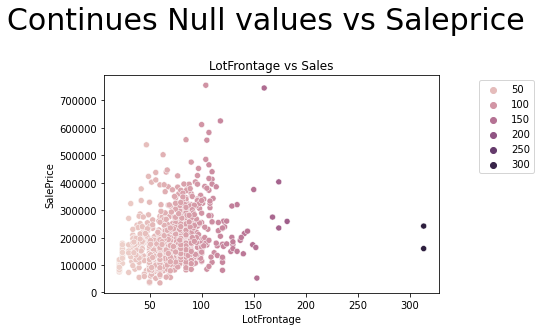

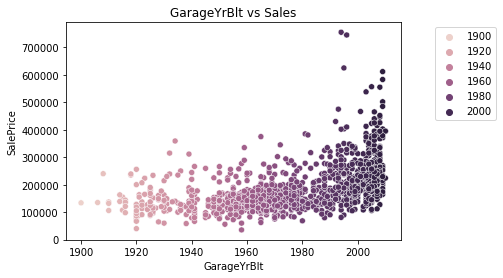

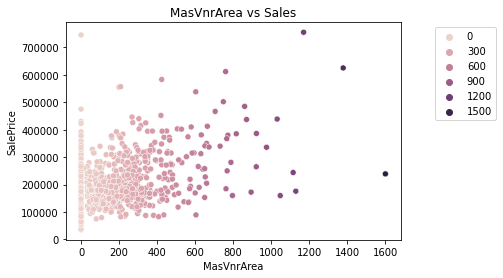

In [27]:
# Creating scatter plots for continues null values
plt.suptitle("Continues Null values vs Saleprice", fontsize = 30, y = 1.12)

for feature in null_quant_list:
  sns.scatterplot(data = train_df, y =  "SalePrice", x =  feature, hue = feature)
  plt.legend(bbox_to_anchor = (1.3, 1))
  plt.title(feature + " vs Sales")
  #plt.savefig(feature+".png")  #for downloading pictures in colab
  #files.download(feature+".png")
  plt.show()
  print("")



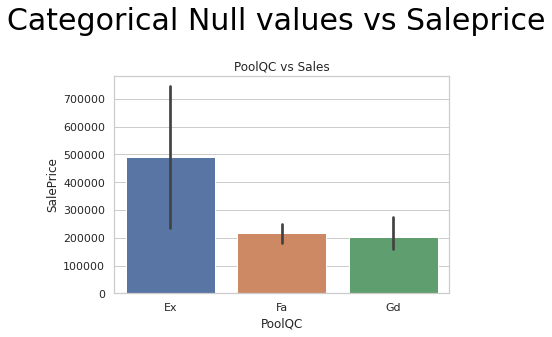

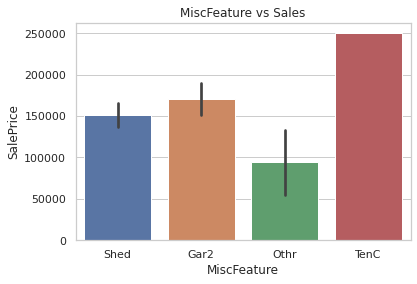

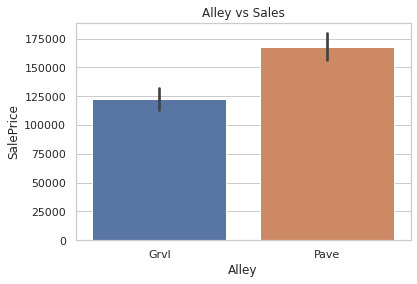

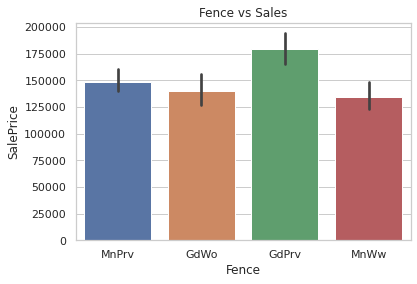

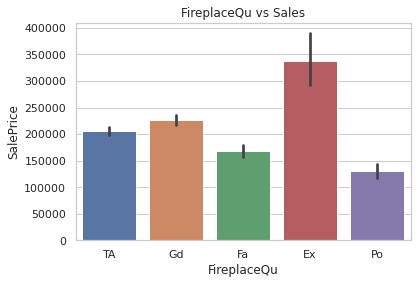

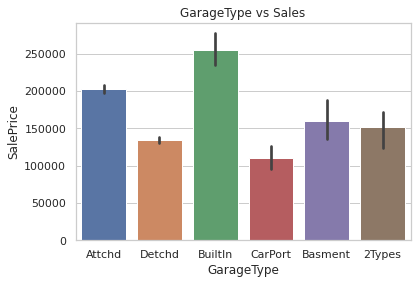

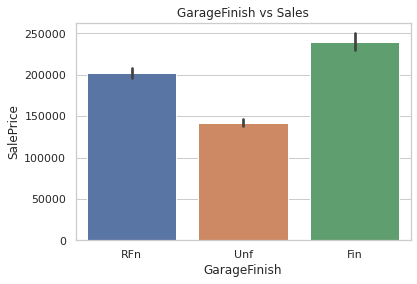

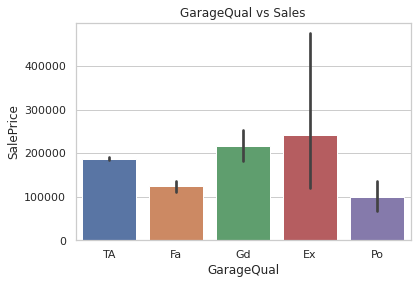

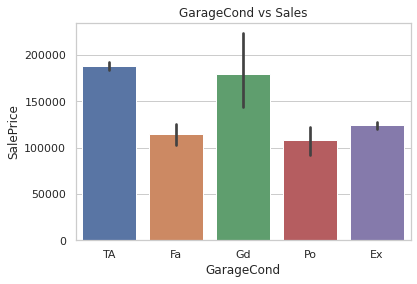

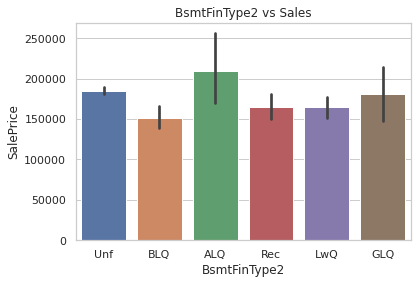

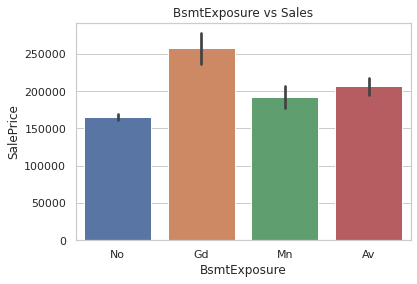

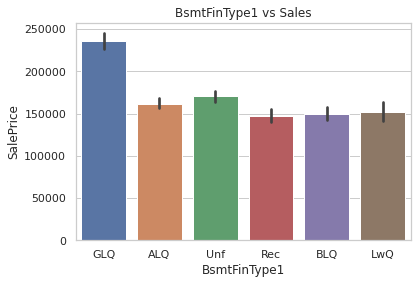

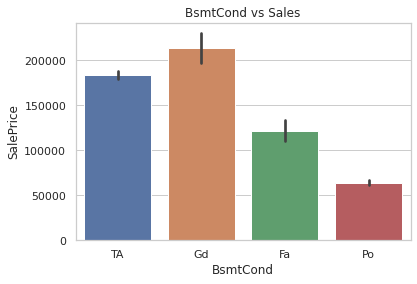

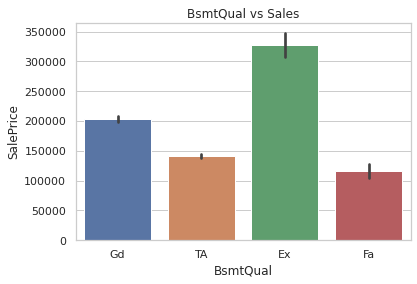

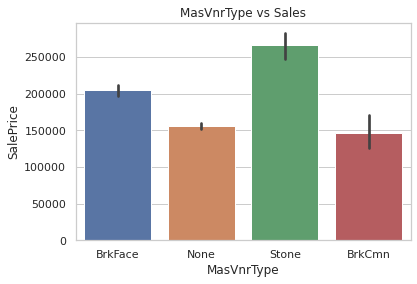

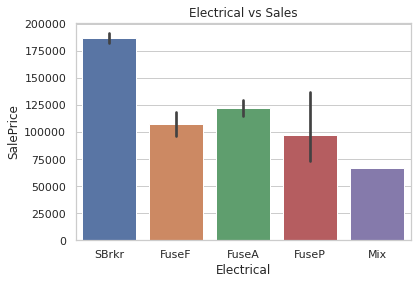

In [28]:
# Creating bar plots for categorical null values
plt.suptitle("Categorical Null values vs Saleprice", fontsize = 30, y = 1.12)
sns.set(style = "whitegrid")
for feature in null_obj_list:
  sns.barplot(data = train_df, y =  "SalePrice", x =  feature)
  plt.title(feature + " vs Sales")
  #plt.savefig(feature+".png")  #for downloading pictures in colab
  #files.download(feature+".png")
  plt.show()
  print("")

In [29]:
# Percentage of null values
for null_variable in null_value_columns:
  print(null_variable +" ",np.round(train_df[null_variable].isnull().mean()*100, 4), "% ", train_df[null_variable].isnull().sum(), "Values")

PoolQC  99.5205 %  1453 Values
MiscFeature  96.3014 %  1406 Values
Alley  93.7671 %  1369 Values
Fence  80.7534 %  1179 Values
FireplaceQu  47.2603 %  690 Values
LotFrontage  17.7397 %  259 Values
GarageYrBlt  5.5479 %  81 Values
GarageType  5.5479 %  81 Values
GarageFinish  5.5479 %  81 Values
GarageQual  5.5479 %  81 Values
GarageCond  5.5479 %  81 Values
BsmtFinType2  2.6027 %  38 Values
BsmtExposure  2.6027 %  38 Values
BsmtFinType1  2.5342 %  37 Values
BsmtCond  2.5342 %  37 Values
BsmtQual  2.5342 %  37 Values
MasVnrArea  0.5479 %  8 Values
MasVnrType  0.5479 %  8 Values
Electrical  0.0685 %  1 Values


### **Imputing Missing Values**

**Highest percentage of null values in these columns**
<pre>
<br>PoolQC        99.5205 %  1453 Values
<br>MiscFeature   96.3014 %  1406 Values
<br>Alley         93.7671 %  1369 Values
<br>Fence         80.7534 %  1179 Values
</pre>





In [30]:
#droping null columns with more than 50 % null values
null_greater_50 = [feature for feature in null_value_columns if (train_df[feature].isnull().mean()*100) > 50]
null_greater_50


['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [31]:
#drop 'PoolQC', 'MiscFeature', 'Alley', 'Fence'
train_df.drop(columns= null_greater_50, inplace= True)

Null_obj_column, and quant columns updated

In [32]:
null_value_columns = [i for i in null_value_columns if i not in null_greater_50]
null_value_columns

['FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [33]:
null_obj_list = [i for i in null_value_columns if train_df[i].dtype == 'O']

In [34]:
null_quant_list = [i for i in null_value_columns if i not in null_obj_list]

In [35]:
# Creating dictionary for mode values of categorical variables
mode_dict = {}
l = len(null_obj_list)
for i in range(l):
  mode_dict[null_obj_list[i]] = train_df[null_obj_list[i]].value_counts().idxmax()
print(mode_dict)

{'FireplaceQu': 'Gd', 'GarageType': 'Attchd', 'GarageFinish': 'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA', 'BsmtFinType2': 'Unf', 'BsmtExposure': 'No', 'BsmtFinType1': 'Unf', 'BsmtCond': 'TA', 'BsmtQual': 'TA', 'MasVnrType': 'None', 'Electrical': 'SBrkr'}


In [36]:
#Creating list of keys from mode dictionary
null_obj_keys = list(mode_dict.keys())
null_obj_keys

['FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

In [37]:
# Function to automatically fill obj null values
def imputation(data):
  train_df[data].replace(np.nan, mode_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [38]:
# calling function imputation
l = len(null_obj_keys)
for i in range(l):
  print(imputation(null_obj_keys[i]))

0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
# Creating dictionary for mean values of quant variables
mean_dict = {}
l = len(null_quant_list)
for i in range(l):
  mean_dict[null_quant_list[i]] = train_df[null_quant_list[i]].mean()
print(mean_dict)

{'LotFrontage': 70.04995836802665, 'GarageYrBlt': 1978.5061638868744, 'MasVnrArea': 103.68526170798899}


In [40]:
# Function to automatically fill continues null values
def imputation(data):
  train_df[data].replace(np.nan, mean_dict[data], inplace = True)
  return train_df[data].isnull().sum()


In [41]:
# Creating key list from mean dictionary

null_quant_keys = list(mean_dict.keys())
null_quant_keys

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [42]:

# Calling imputation function

l = len(null_quant_keys)
for i in range(l):
  print(imputation(null_quant_keys[i]))

0
0
0


In [43]:
# Checkin null values again
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

All Null values are cleared

###**EDA For All variables**

In [44]:
# Separating All Categorical Varibles
cat_variables = train_df.select_dtypes("O").columns
print("Number of catergorical variables", len(cat_variables))
train_df[cat_variables].head()

Number of catergorical variables 39


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          Gd     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [45]:
# Sepearating year features 
year_variables = [i for i in train_df.columns if "Yr" in i or "Year" in i]
print("Number of year features: ",len(year_variables))
train_df[year_variables].head()

Number of year features:  4


YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [46]:
#Separating continues variables
cont_variables = [i for i in train_df.columns if i not in cat_variables and i not in year_variables]

In [47]:
# Finding number of unique values in dataset
for i in train_df.columns:
  print(i, "has", train_df[i].nunique(), "values")

MSSubClass has 15 values
MSZoning has 5 values
LotFrontage has 111 values
LotArea has 1073 values
Street has 2 values
LotShape has 4 values
LandContour has 4 values
Utilities has 2 values
LotConfig has 5 values
LandSlope has 3 values
Neighborhood has 25 values
Condition1 has 9 values
Condition2 has 8 values
BldgType has 5 values
HouseStyle has 8 values
OverallQual has 10 values
OverallCond has 9 values
YearBuilt has 112 values
YearRemodAdd has 61 values
RoofStyle has 6 values
RoofMatl has 8 values
Exterior1st has 15 values
Exterior2nd has 16 values
MasVnrType has 4 values
MasVnrArea has 328 values
ExterQual has 4 values
ExterCond has 5 values
Foundation has 6 values
BsmtQual has 4 values
BsmtCond has 4 values
BsmtExposure has 4 values
BsmtFinType1 has 6 values
BsmtFinSF1 has 637 values
BsmtFinType2 has 6 values
BsmtFinSF2 has 144 values
BsmtUnfSF has 780 values
TotalBsmtSF has 721 values
Heating has 6 values
HeatingQC has 5 values
CentralAir has 2 values
Electrical has 5 values
1stFlrS

In [48]:
# find ordinal data from numerical data
ordinal_data = [i for i in cont_variables if train_df[i].nunique() < 50]
print("number of ordinal data", len(ordinal_data))
train_df[ordinal_data].head()
  

number of ordinal data 17


MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

In [49]:
# updating continues variables
cont_variables = [i for i in cont_variables if i not in ordinal_data+["Id"]]
print("Length of continues variables", len(cont_variables))
train_df[cont_variables].head()

Length of continues variables 16


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

<Figure size 432x288 with 0 Axes>

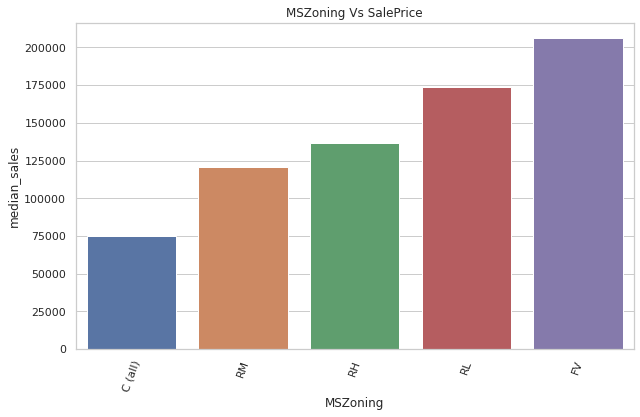

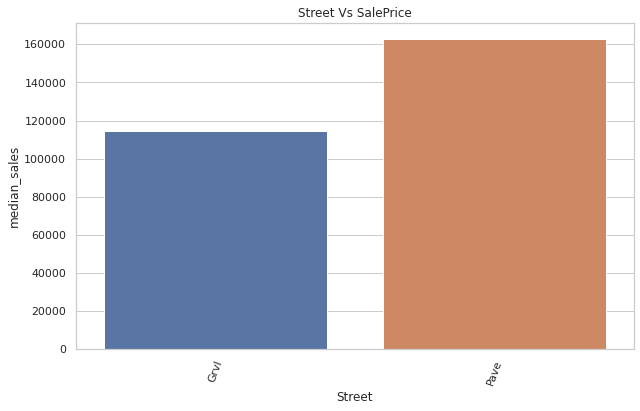

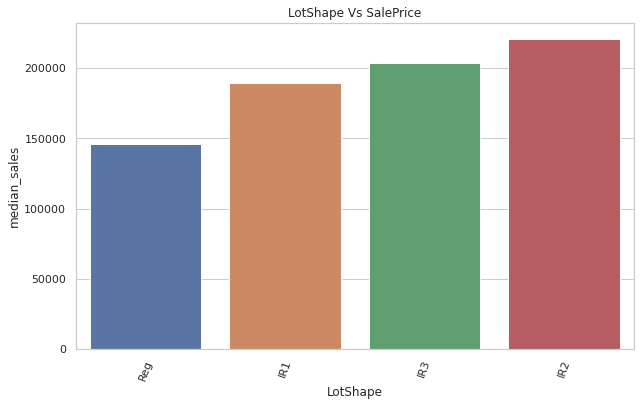

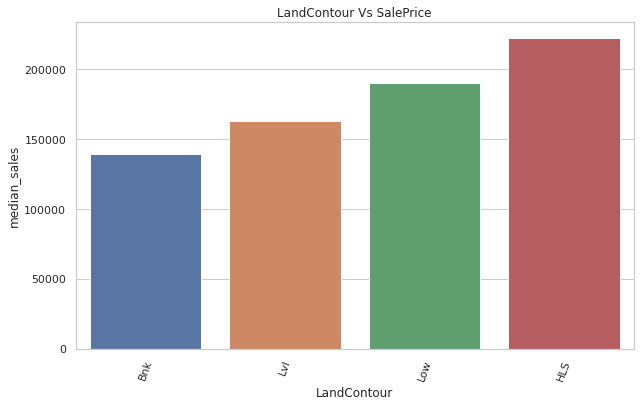

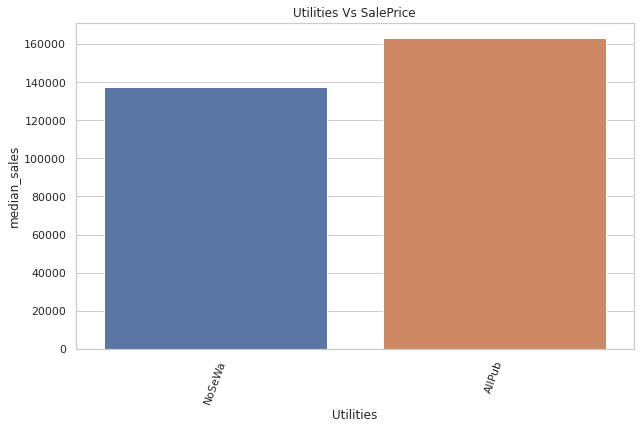

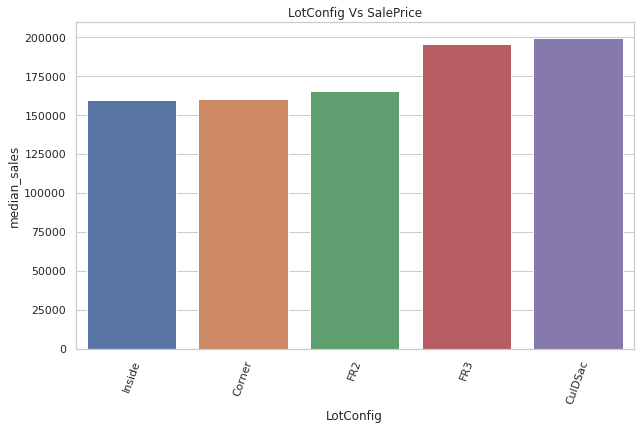

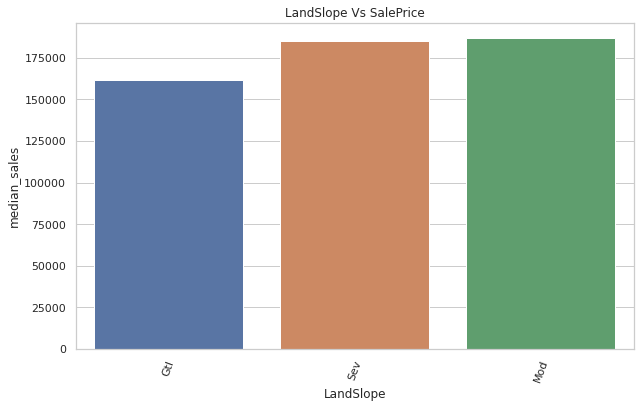

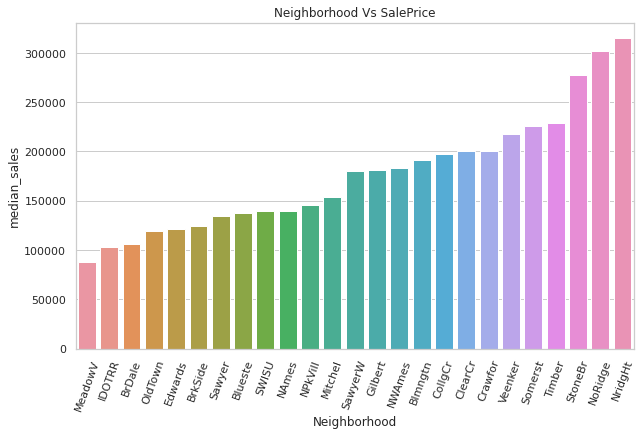

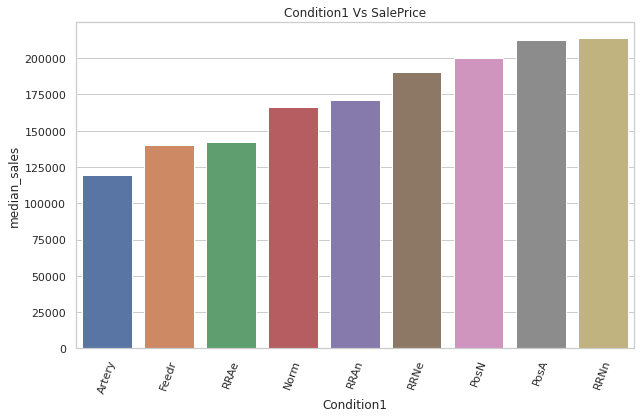

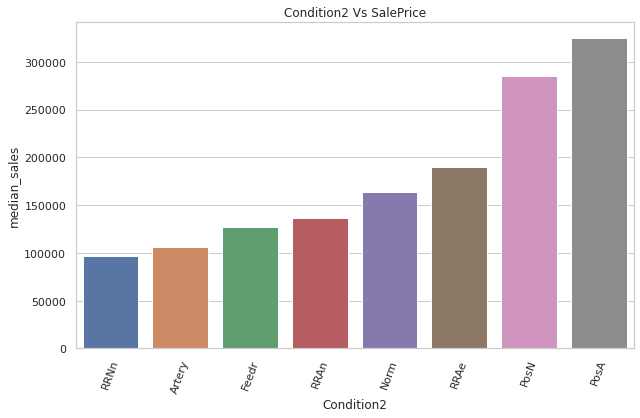

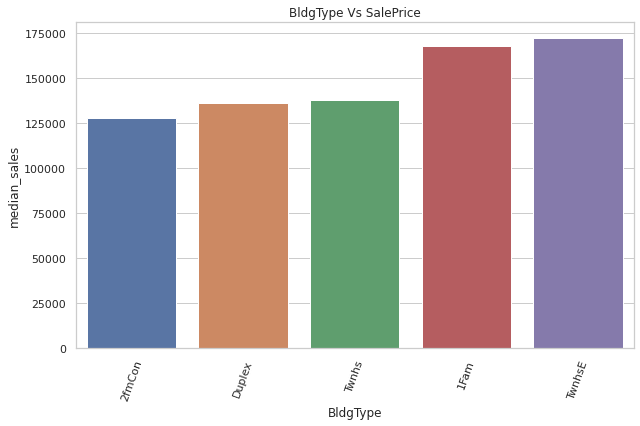

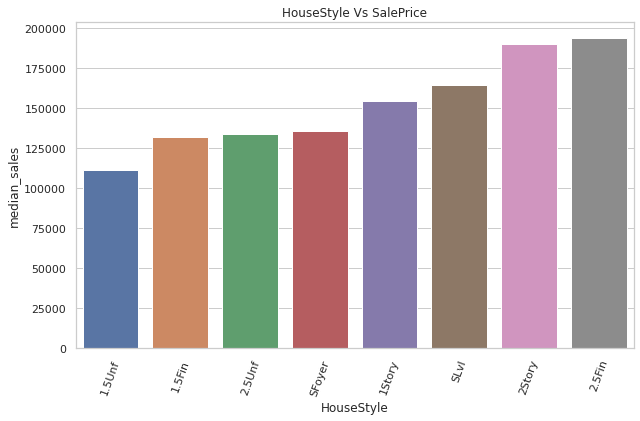

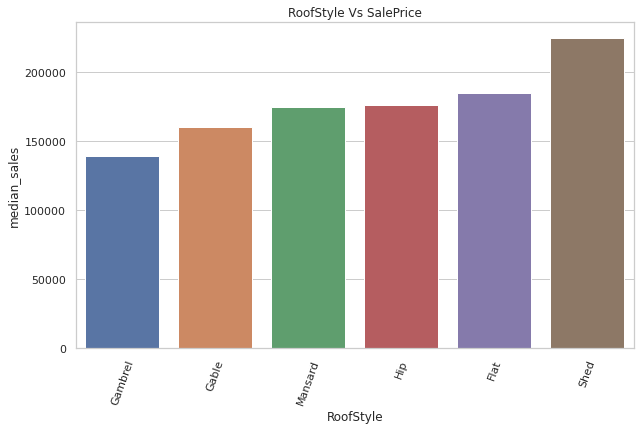

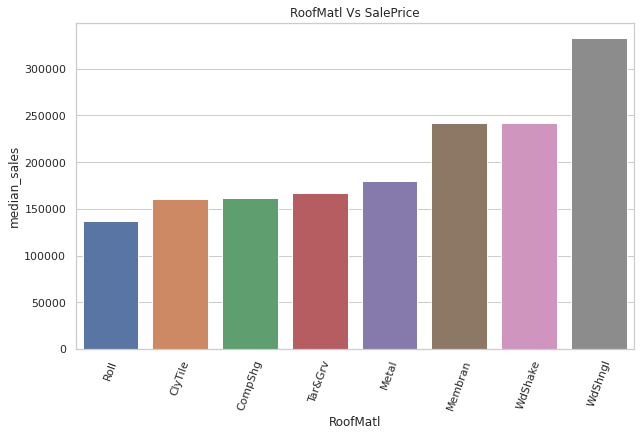

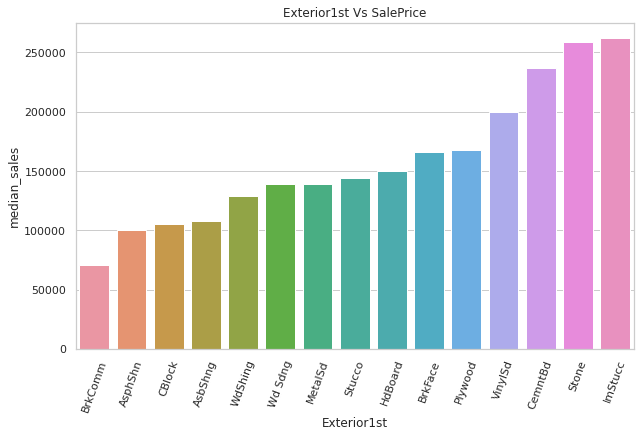

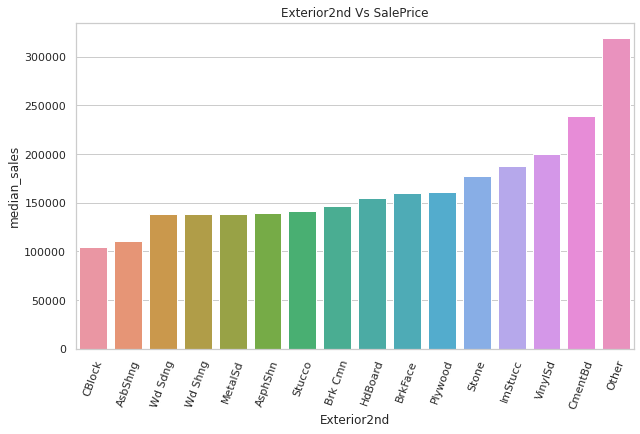

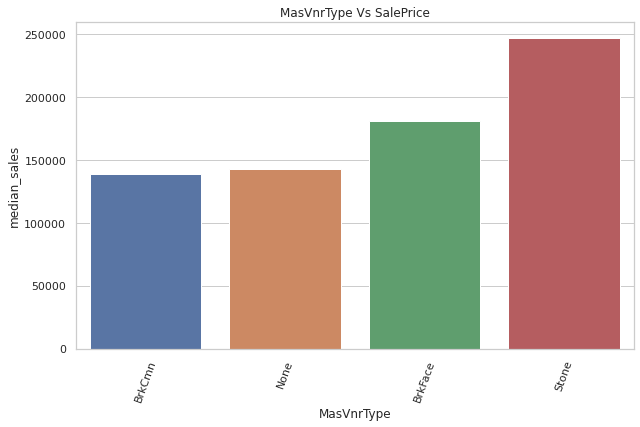

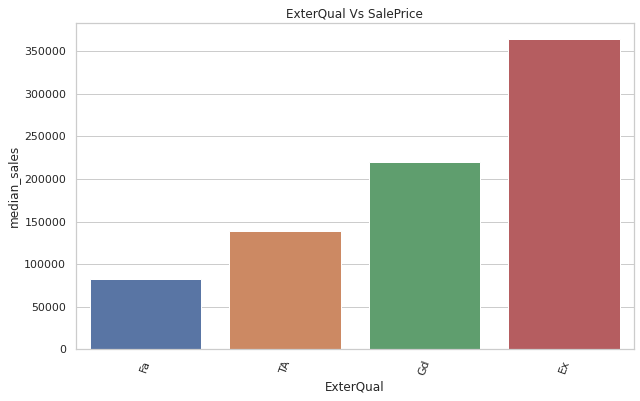

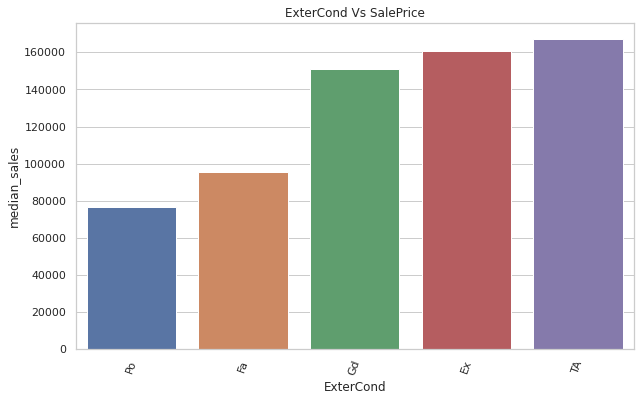

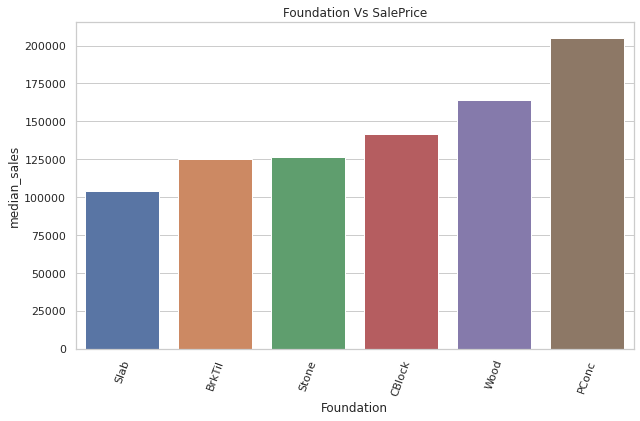

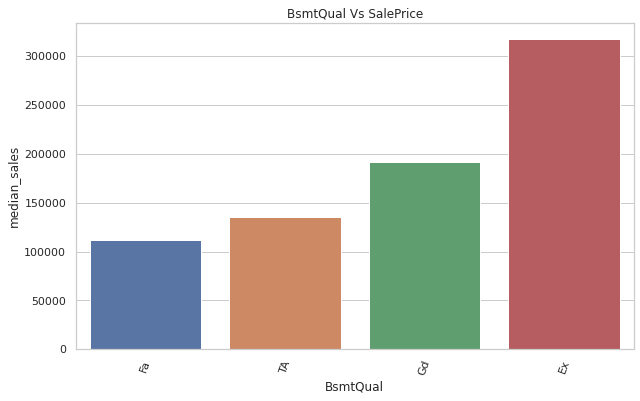

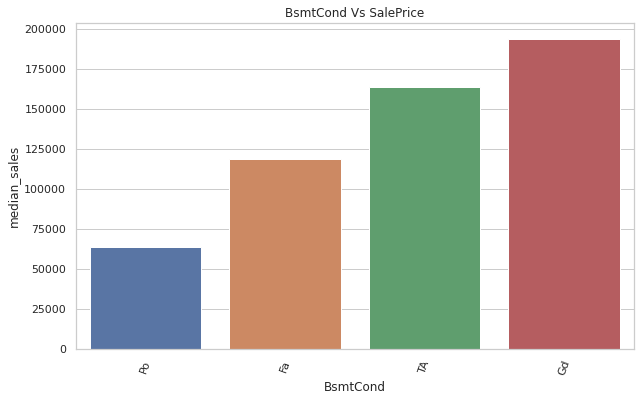

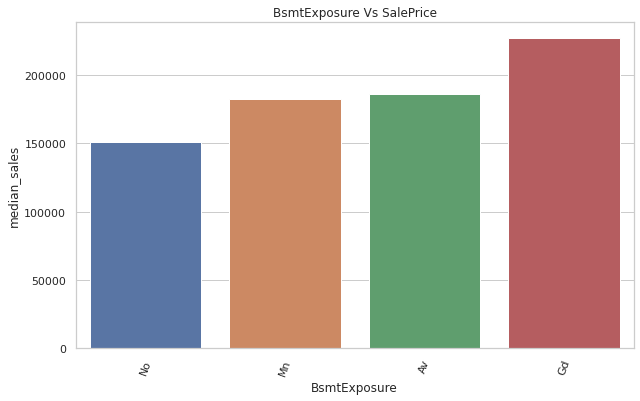

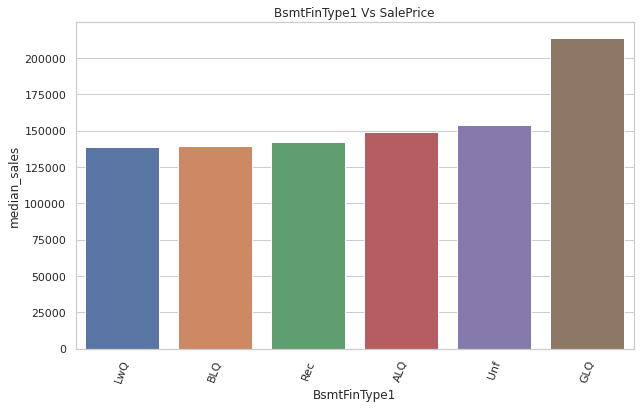

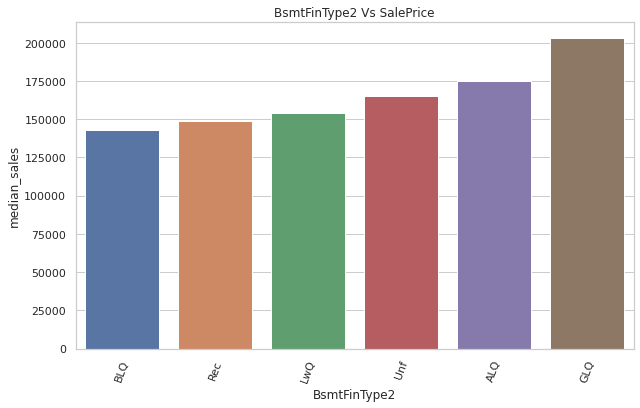

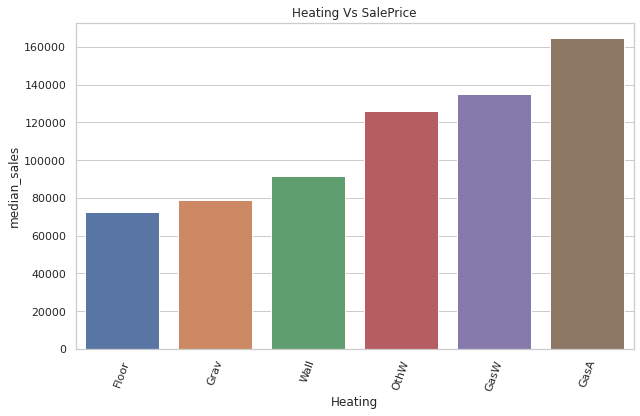

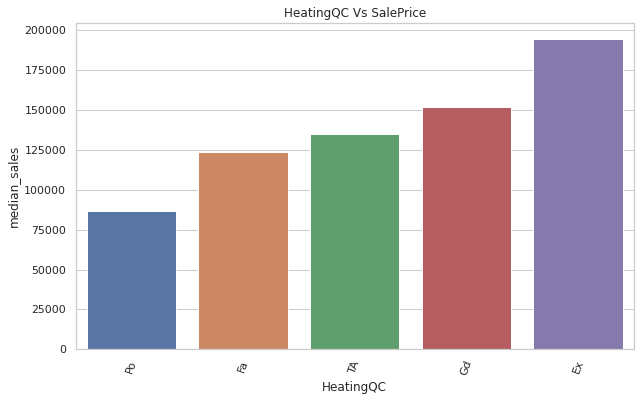

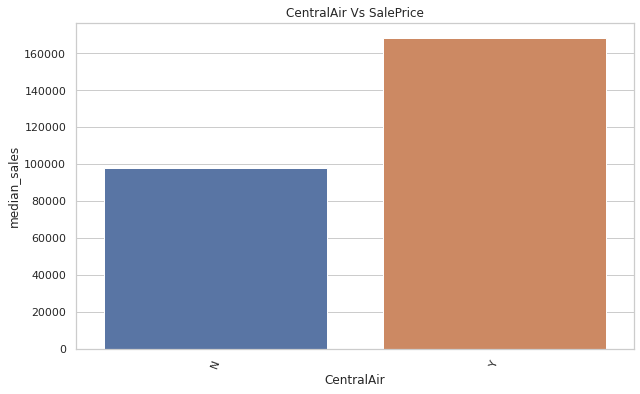

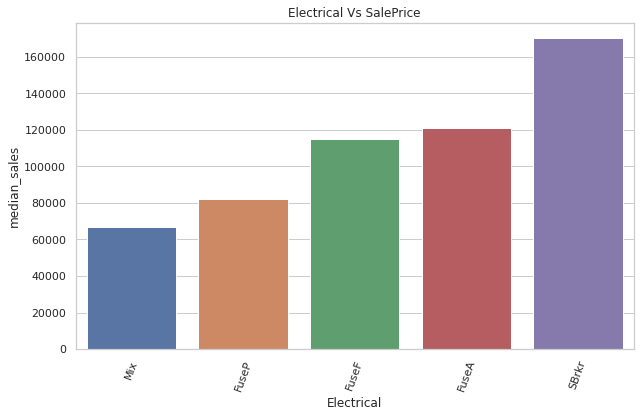

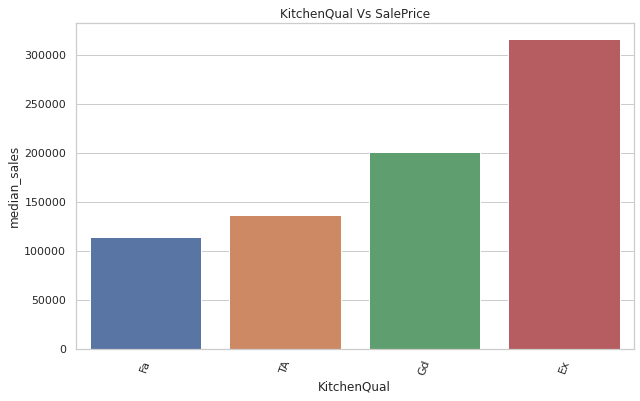

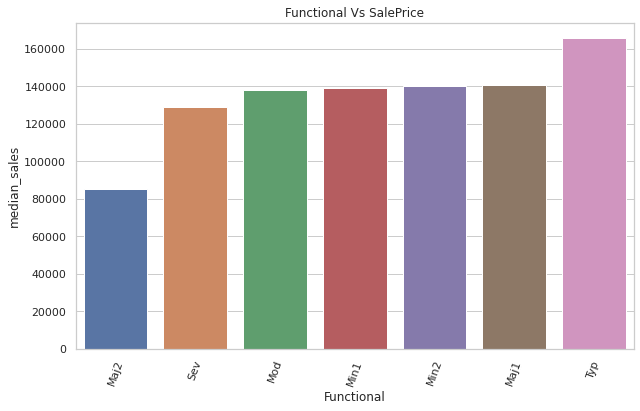

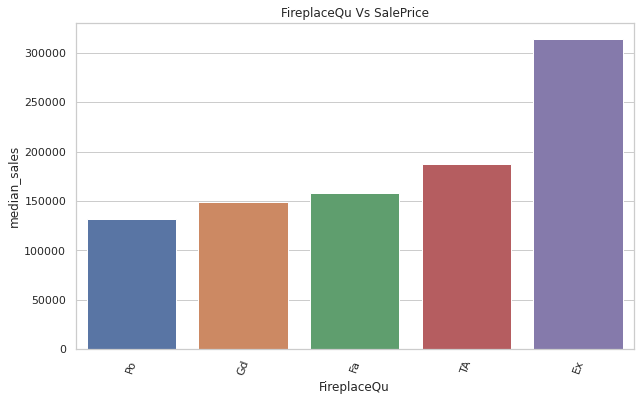

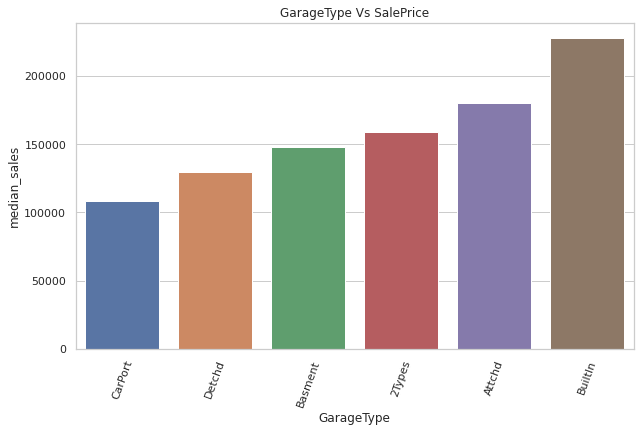

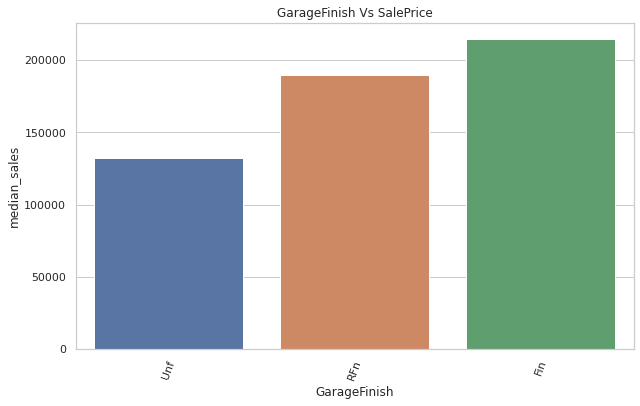

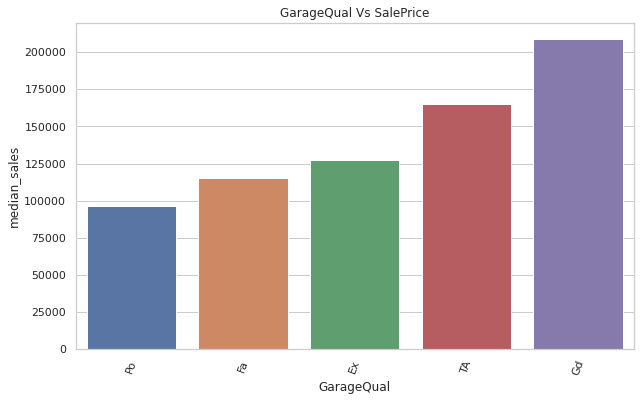

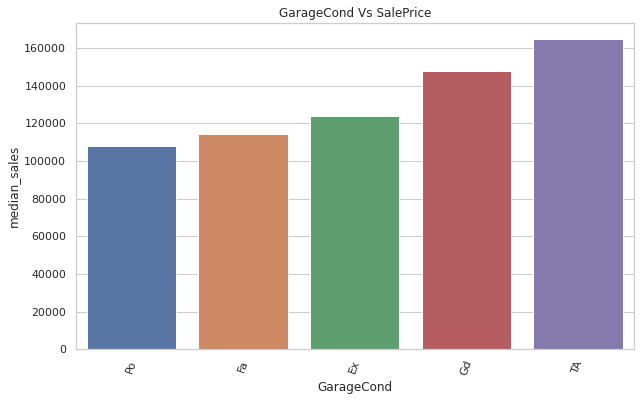

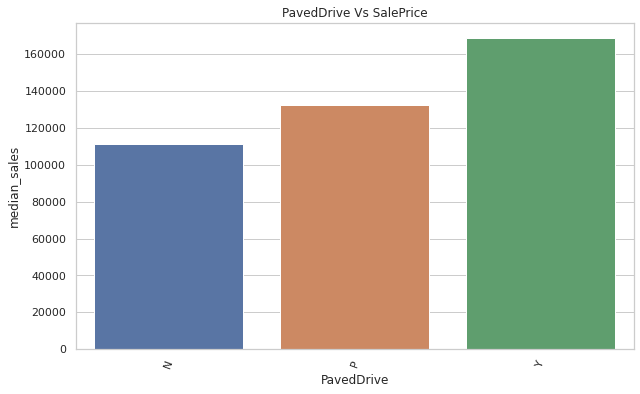

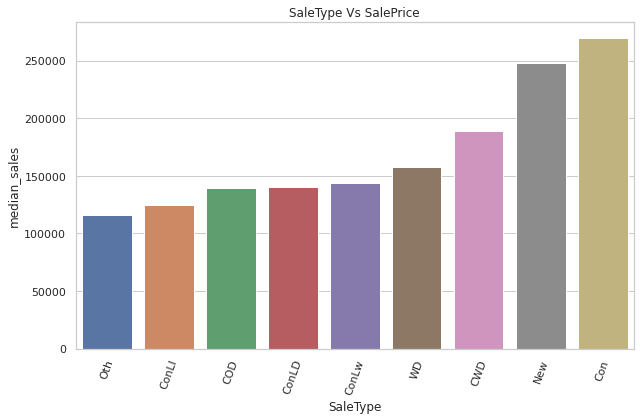

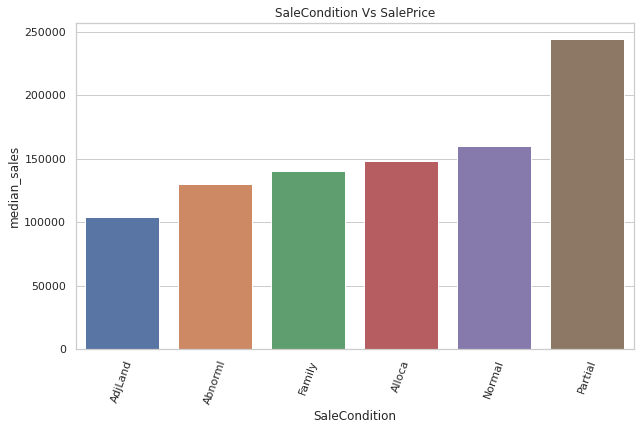

In [50]:

#


# Creating charts for categorical Variables
data = train_df.copy()
plt.suptitle("Categorical Variables Vs Sales",y = 1.2, fontsize = 30)

#
for feature in cat_variables:
  plt.figure(figsize= (10, 6))
  df = data.groupby(feature).agg(median_sales = ('SalePrice', "median"))
  df  = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales")
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()

<Figure size 432x288 with 0 Axes>

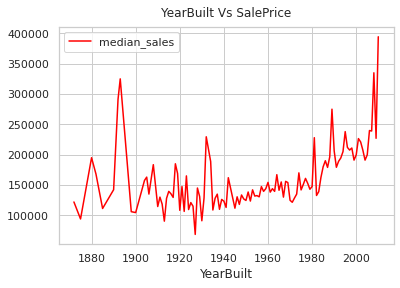

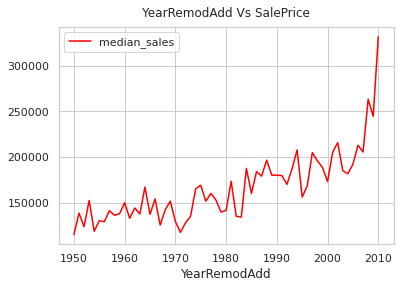

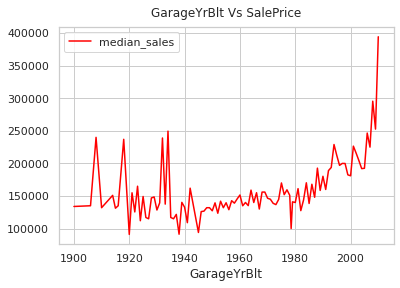

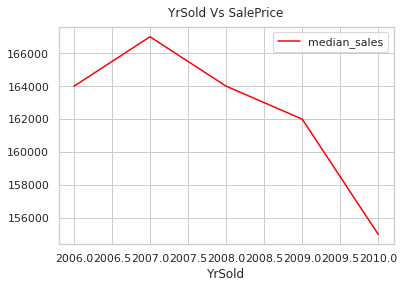

In [51]:

#
plt.suptitle("Year Features Vs Sales",y = 1.2, fontsize = 30)
for feature in year_variables:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df.plot(color = "red")
  plt.title(feature + " Vs SalePrice", pad = 10)
  print("")
  plt.show()

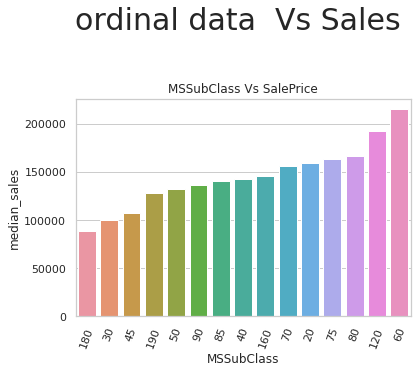

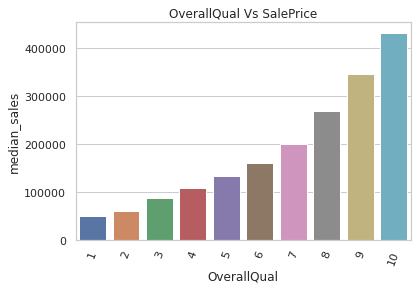

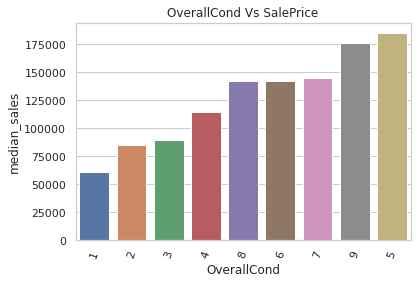

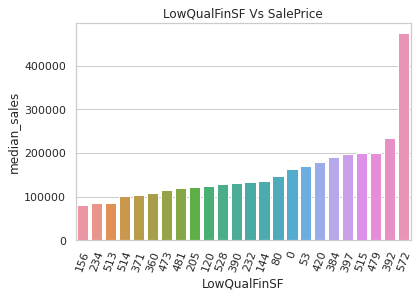

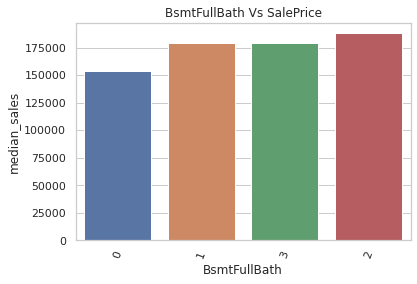

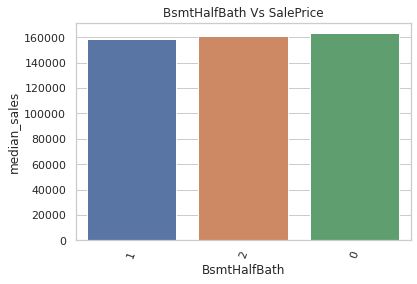

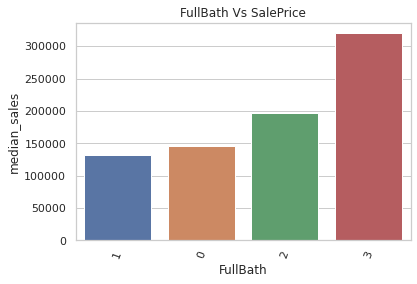

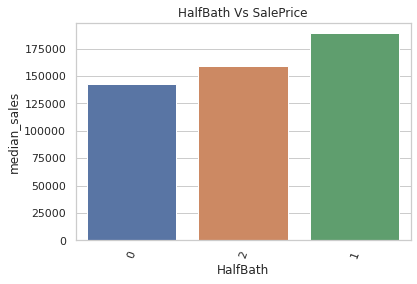

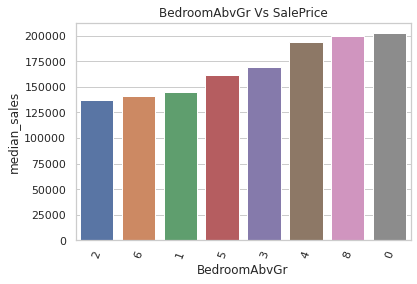

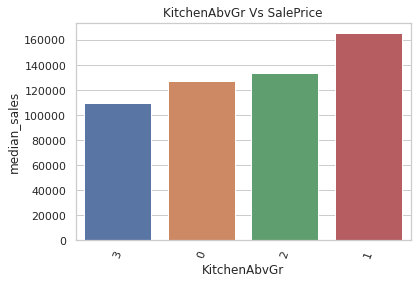

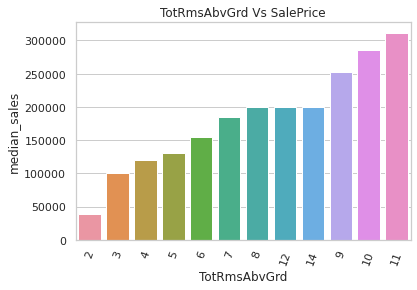

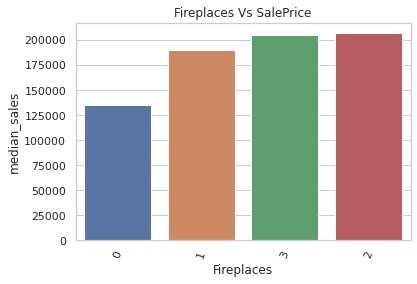

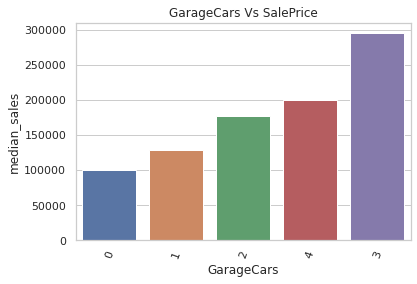

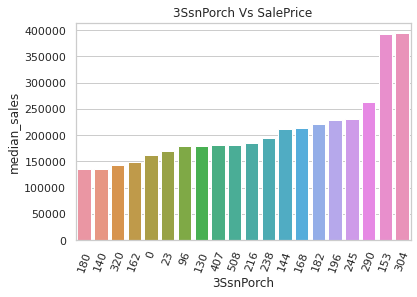

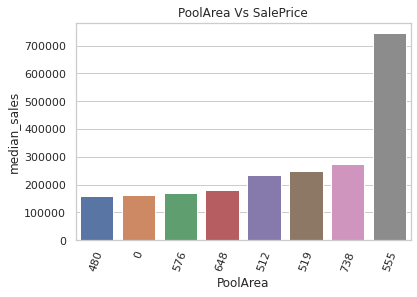

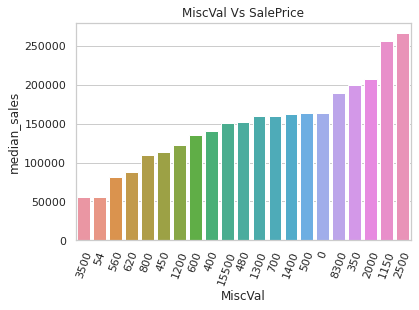

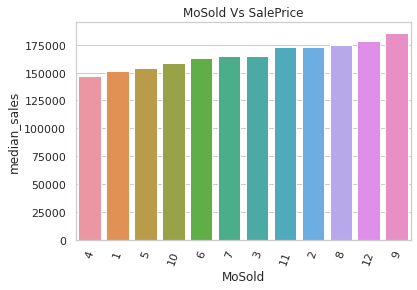

In [52]:

# Creating charts for ordinal data 
plt.suptitle("ordinal data  Vs Sales",y = 1.2, fontsize = 30)

#
data = train_df.copy()
for feature in ordinal_data:
  df = data.groupby(feature).agg(median_sales = ("SalePrice", "median"))
  df = df.reset_index().sort_values("median_sales")
  sns.barplot(data = df, x = feature, y = "median_sales", order= df[feature])
  plt.title(feature + " Vs SalePrice")
  plt.xticks(rotation = 70)
  print("")
  plt.show()


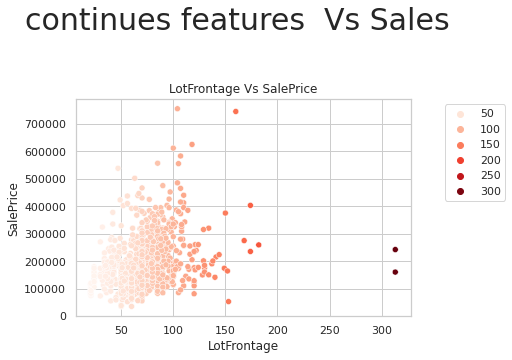

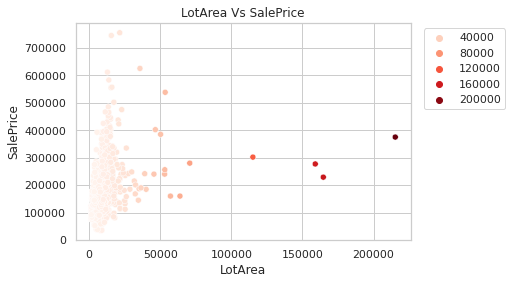

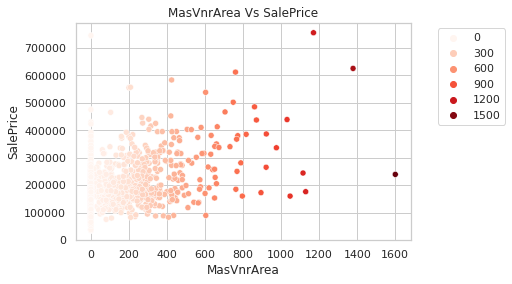

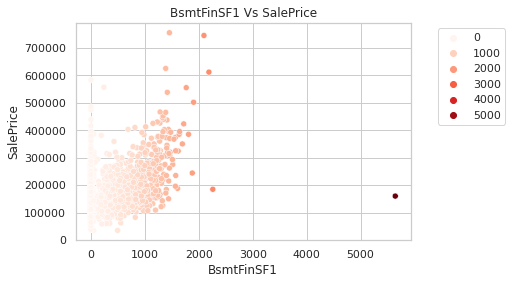

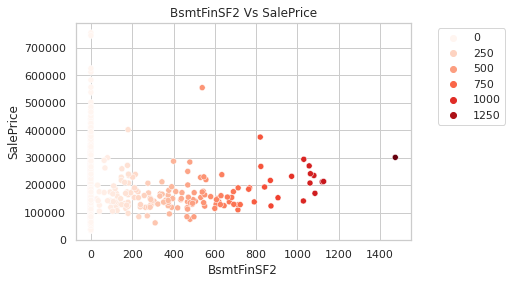

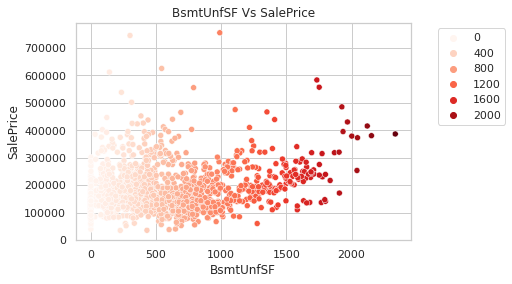

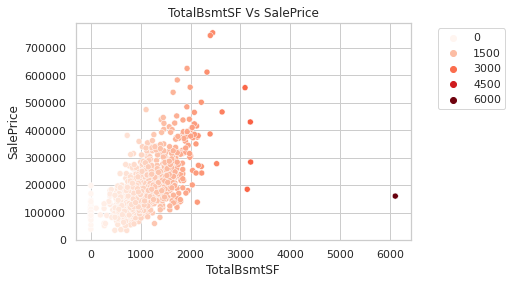

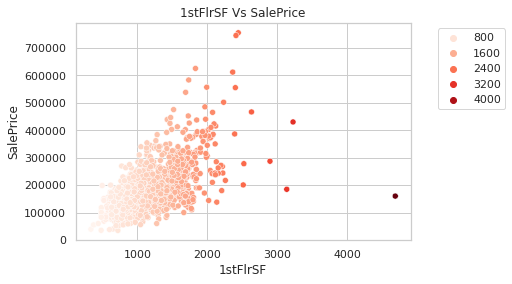

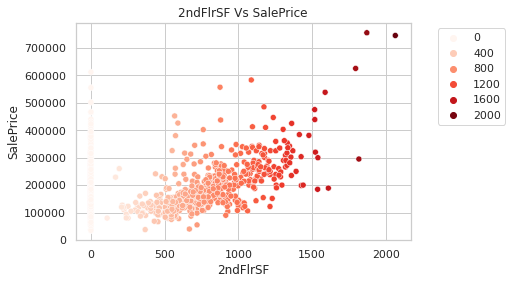

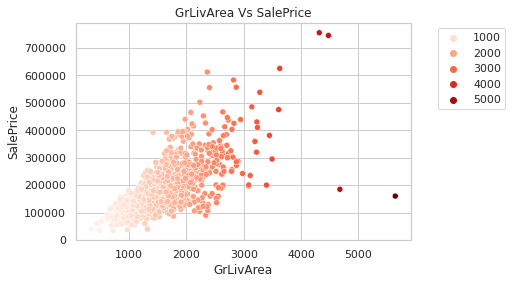

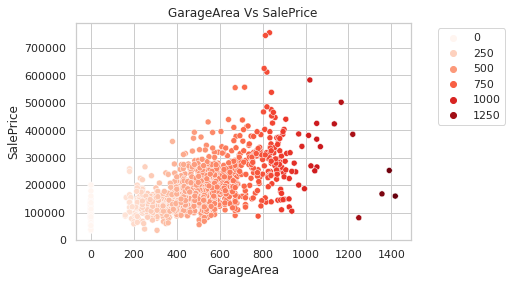

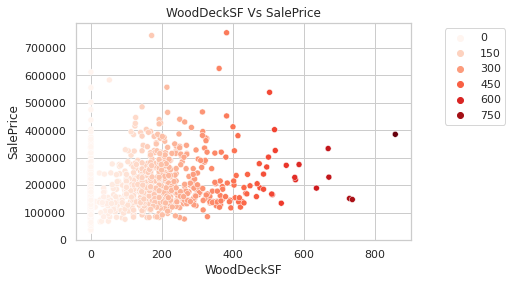

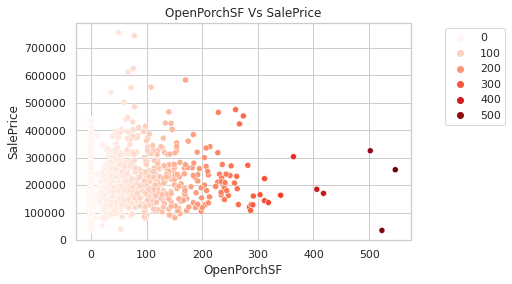

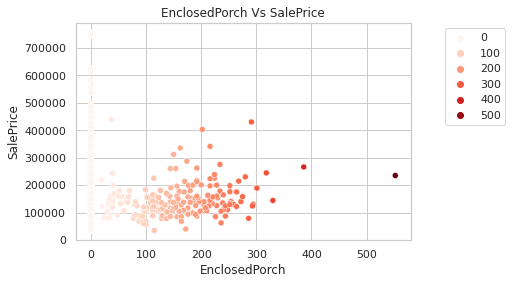

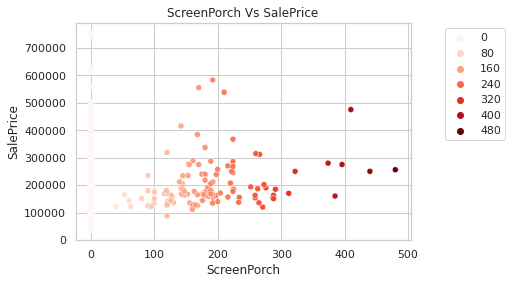

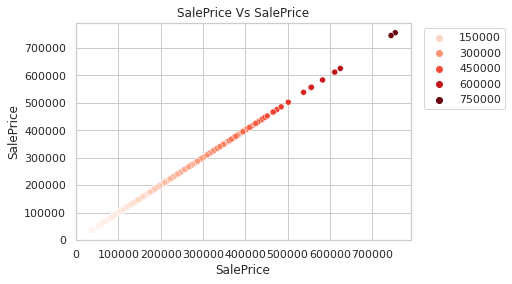

In [53]:

# Creating charts for continues features
plt.suptitle("continues features  Vs Sales",y = 1.2, fontsize = 30)

#
data = train_df.copy()
for feature in cont_variables:
  sns.scatterplot(data = data , x = feature, y = "SalePrice", hue = feature, palette= "Reds" )
  plt.title(feature + " Vs SalePrice")
  plt.legend(bbox_to_anchor = (1.3, 1))
  #plt.xticks(rotation = 70)
  print("")
  plt.show()


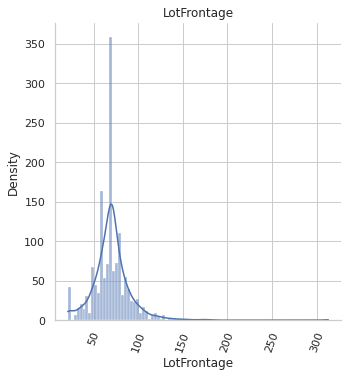

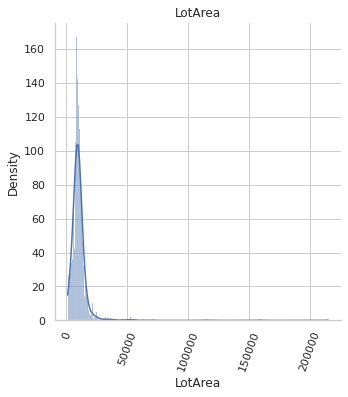

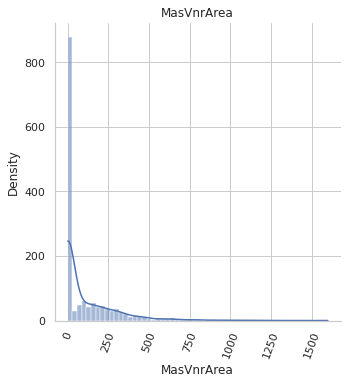

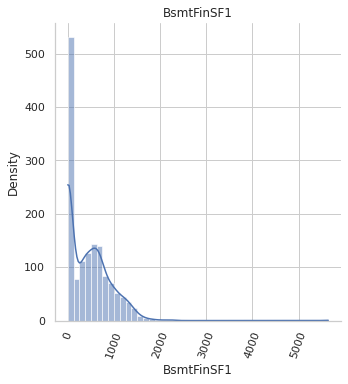

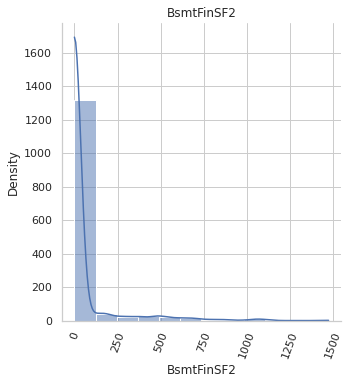

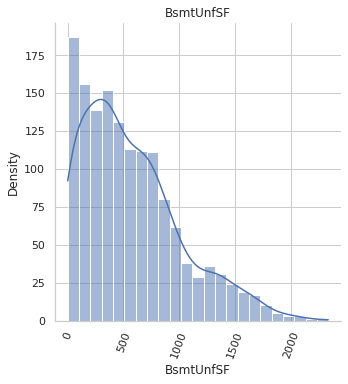

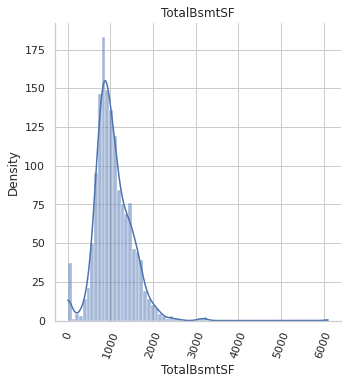

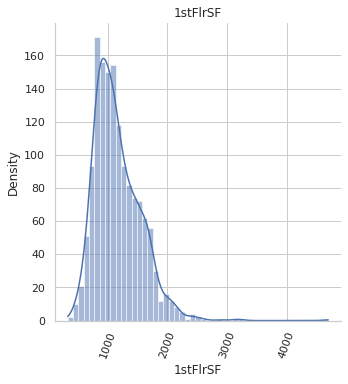

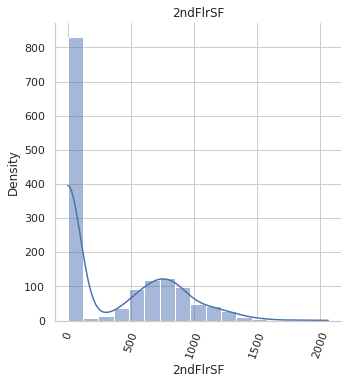

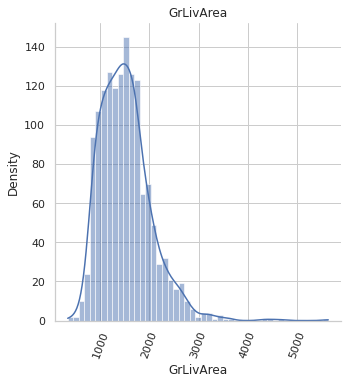

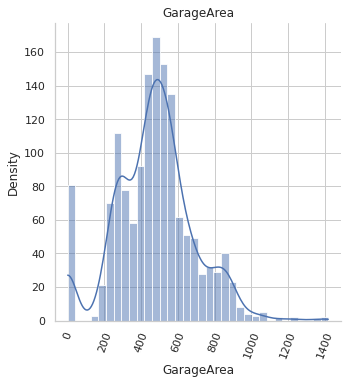

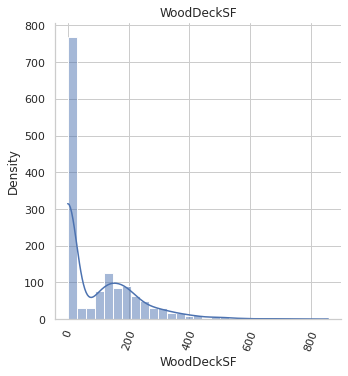

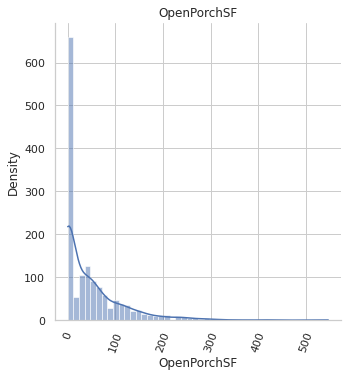

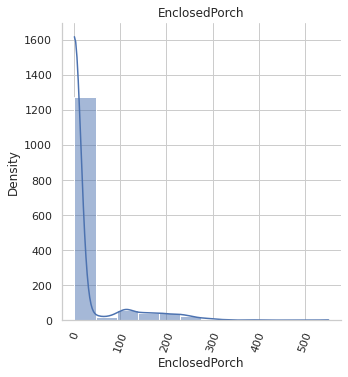

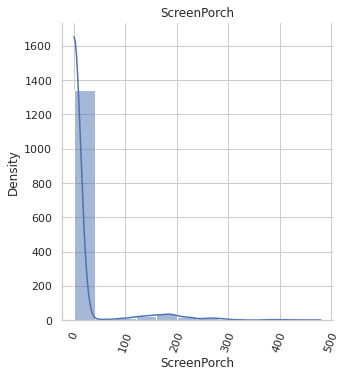

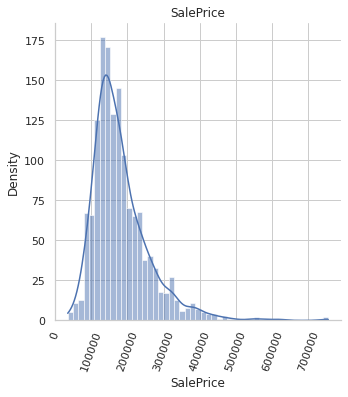

In [54]:

# Checking distribution of continues variabls

for i in cont_variables:
  sns.displot(train_df[i], kde = True)
  plt.ylabel("Density")
  plt.xticks(rotation = 70)
  plt.title(i)
  print("")
  plt.show()

Handling skewed data [https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


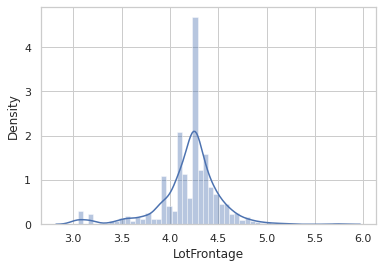

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


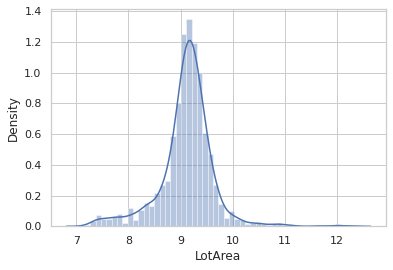

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2403: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2759: RuntimeWarning: invalid value encountered in subtract
  out = np.subtract(pct[1], pct[0])


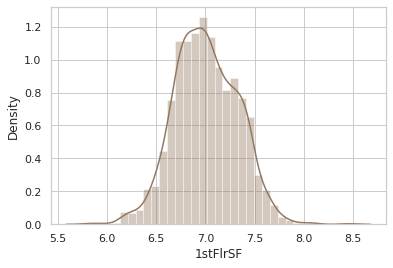

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2403: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


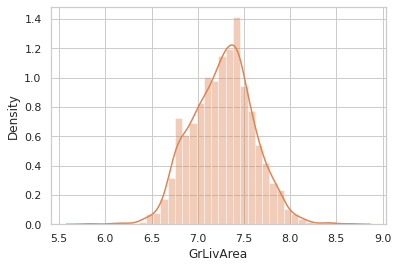

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2403: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2759: RuntimeWarning: invalid value encountered in subtract
  out = np.subtract(pct[1], pct[0])


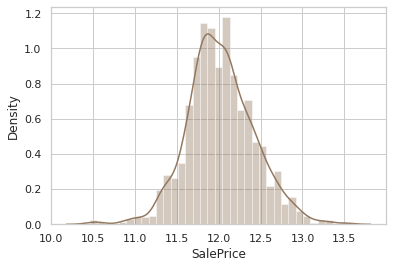

In [55]:

#Log transformation of skewed data
#using try and except becuse of Nan values in log transformed
data = train_df.copy()
for i in cont_variables:
  try:
    data[i] = np.log(data[i])
    sns.distplot(data[i])
    plt.show()
  except:
    pass

### Checking for outlier###

In [56]:
#
import warnings
warnings.filterwarnings("ignore")

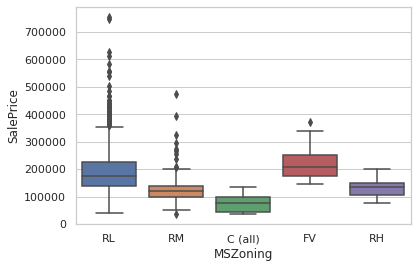

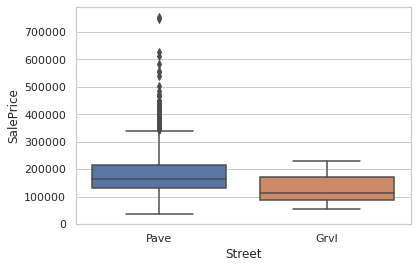

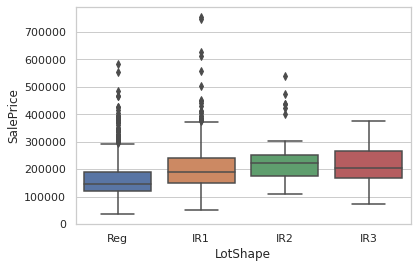

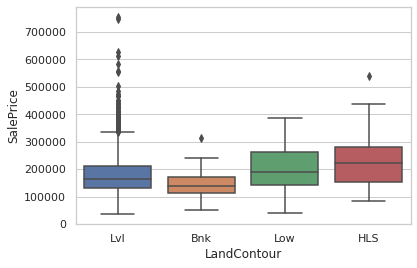

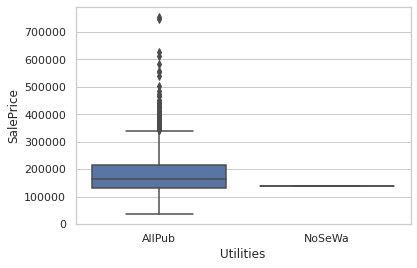

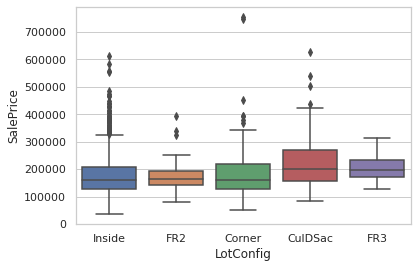

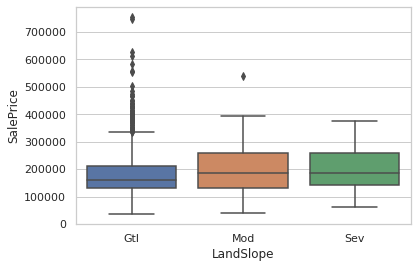

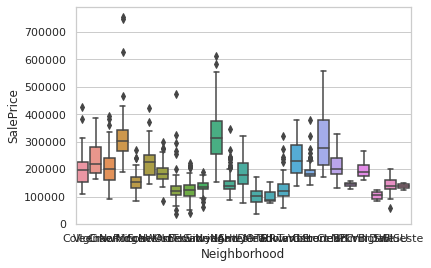

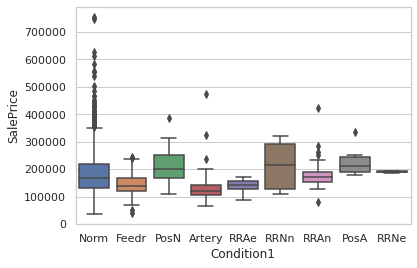

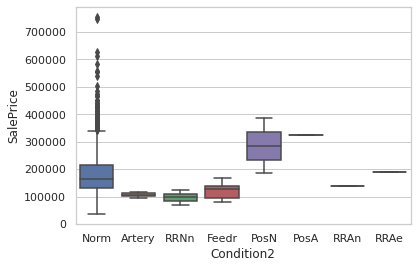

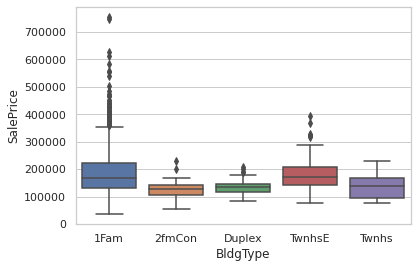

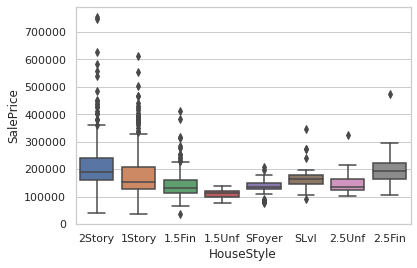

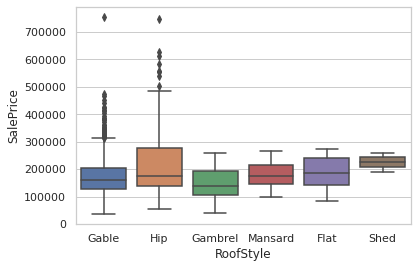

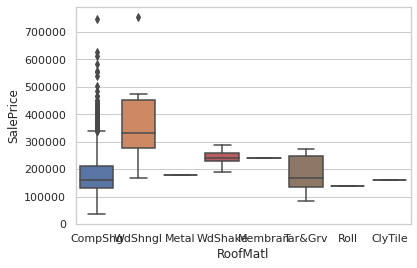

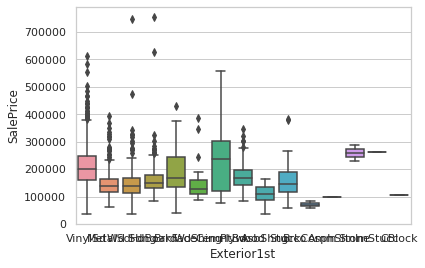

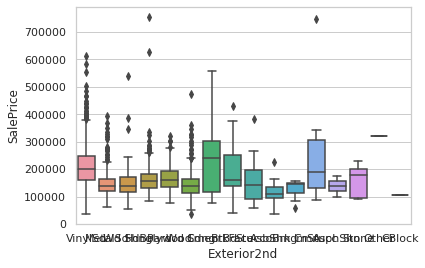

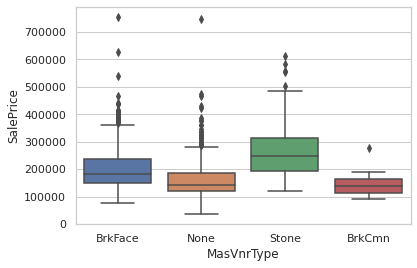

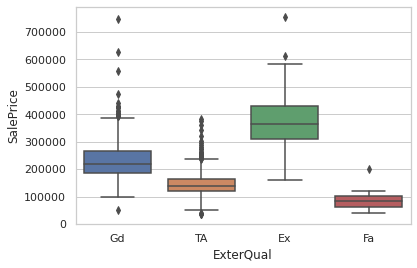

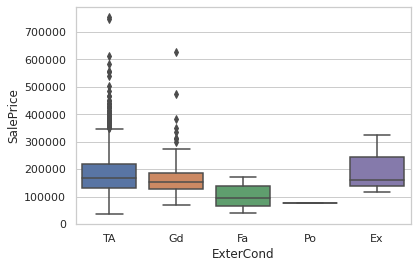

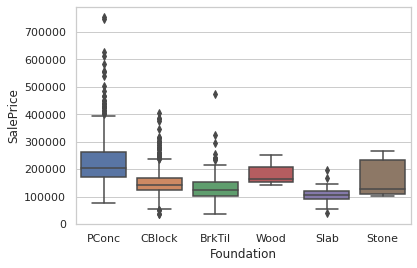

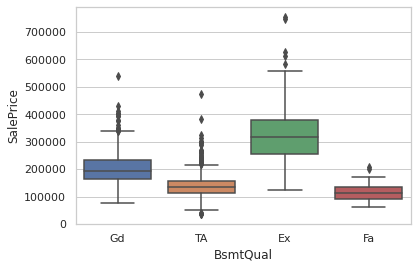

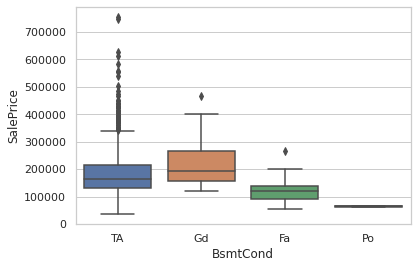

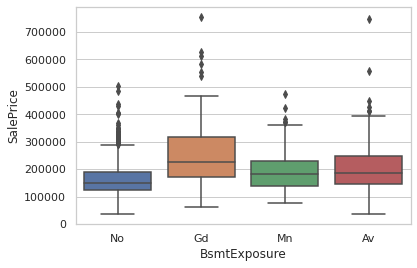

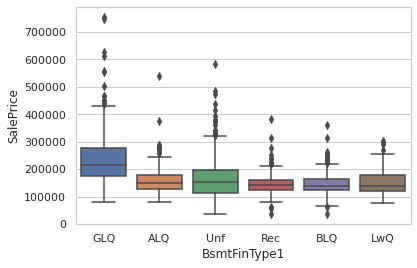

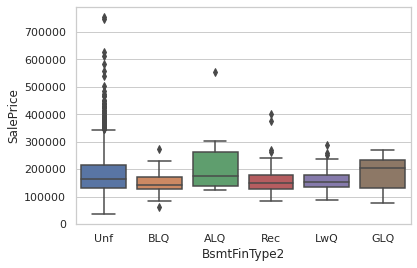

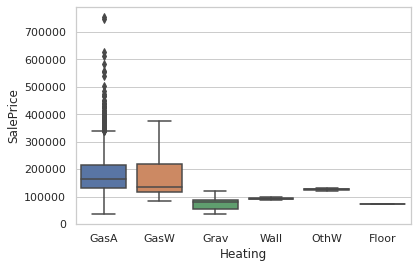

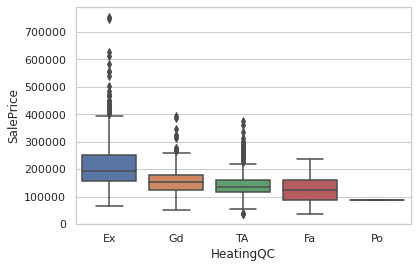

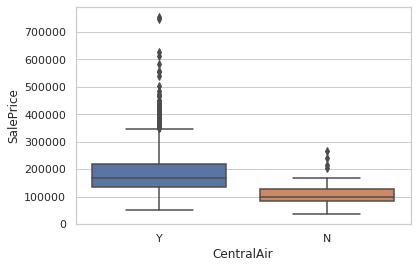

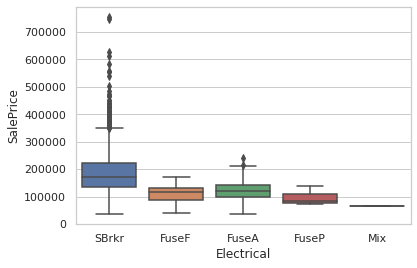

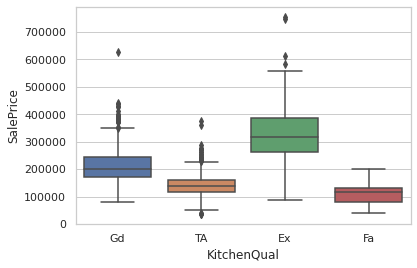

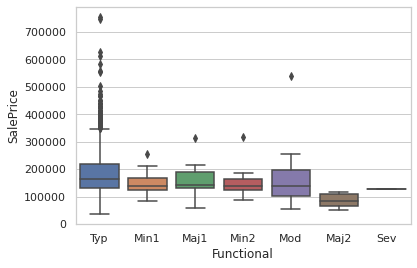

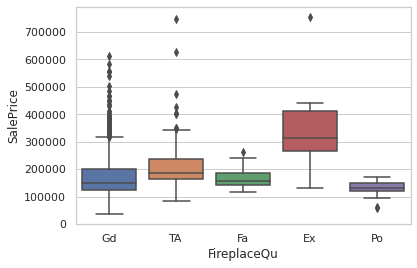

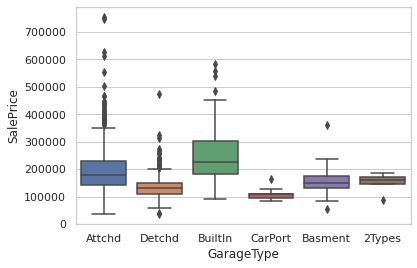

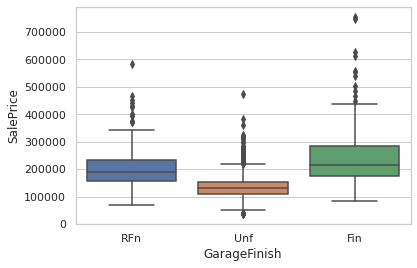

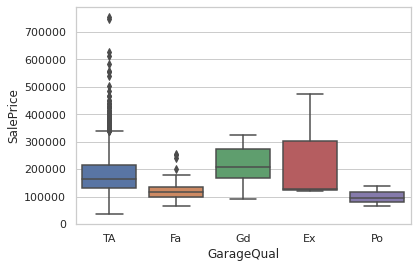

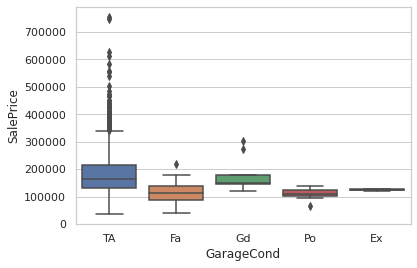

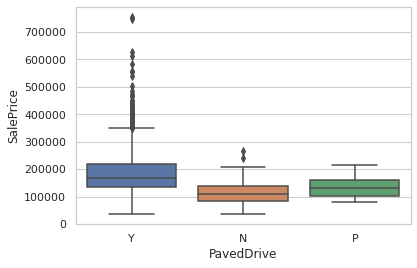

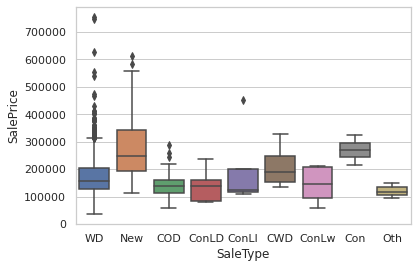

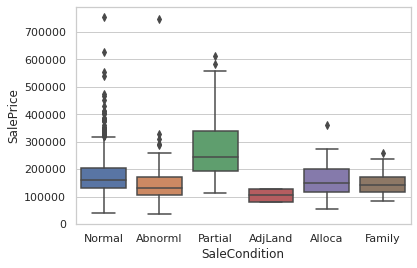

In [57]:

# Ploting boxplot for finding ouliers in categorical variables
for i in cat_variables:
  sns.boxplot(x = train_df[i], y = train_df["SalePrice"])
  print("")
  plt.show()

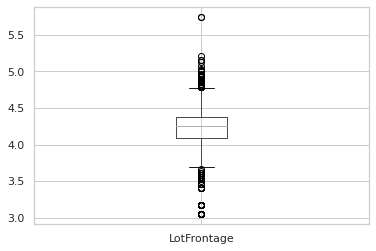

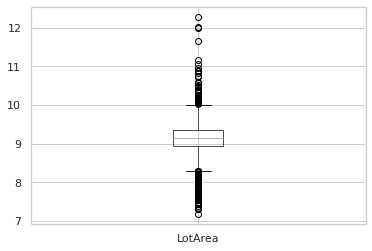

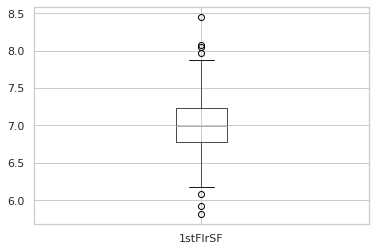

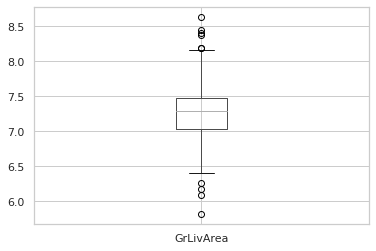

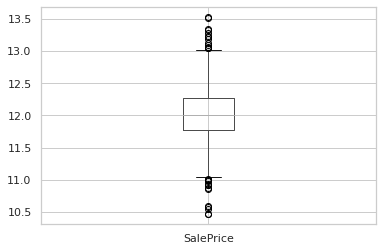

In [58]:

#box plots for coninues data
data = train_df.copy()

for i in cont_variables:
  if 0 in train_df[i].unique():
    pass
  else:
    data[i] = np.log(data[i])
    data.boxplot(column = i)
    plt.show()

##**Stastical Analysis**

Hypothesis  Testing for Continues Variables

-   $H_0:$ continues variables not correlated with SalePrice
-   $H_1:$ continues variables correlated with SalePrice

-   Use α = 0.05

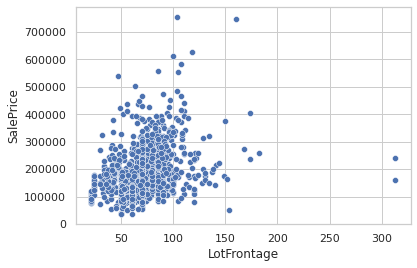

1.3466505607159591e-39


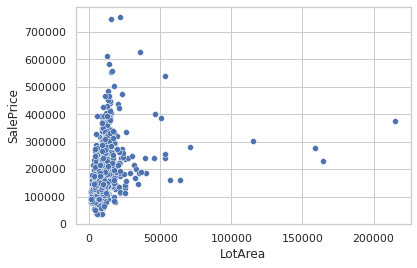

1.123139154919434e-24


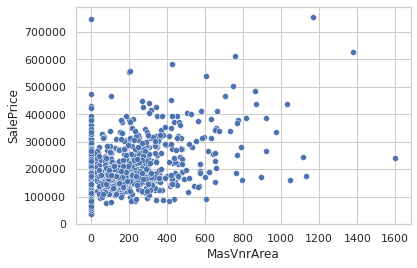

3.9247117417897636e-83


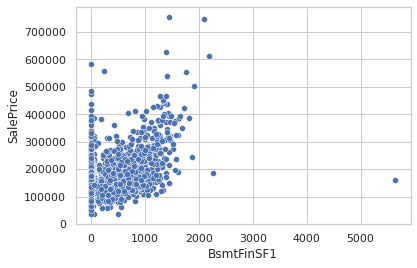

3.3941098292907553e-53


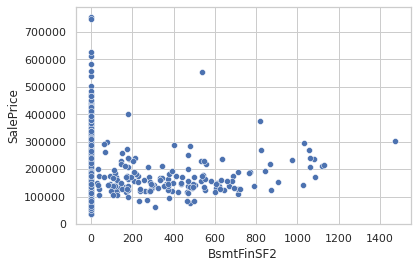

0.663998650834577


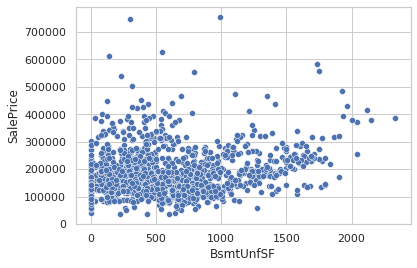

1.1829757963602225e-16


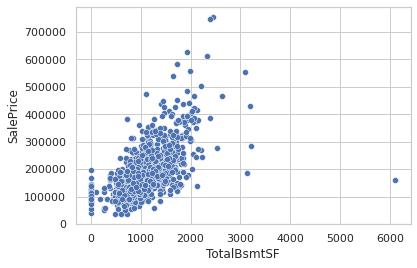

9.484229391507914e-152


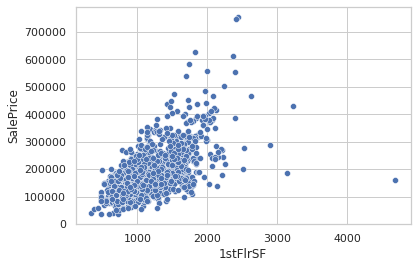

5.394710618971284e-147


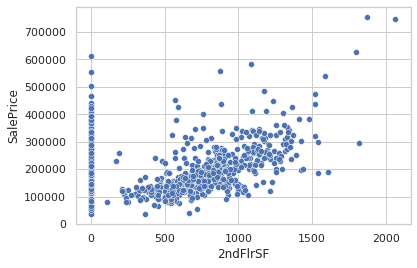

5.764335119183061e-36


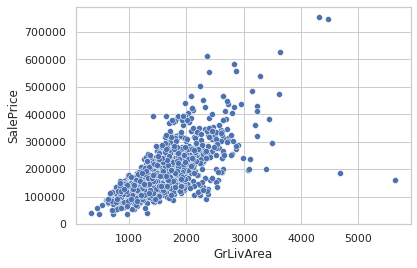

4.518033646779431e-223


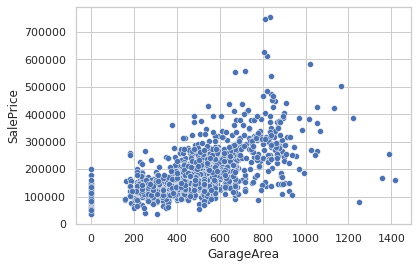

5.2650381679778054e-158


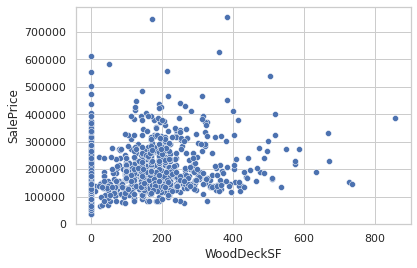

3.972216535629994e-37


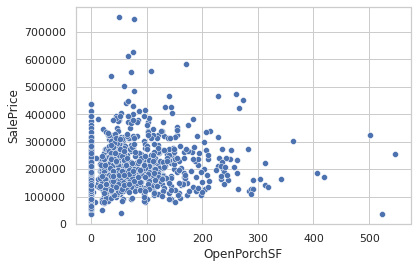

3.49337362309738e-35


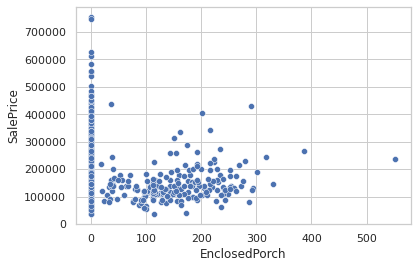

8.255770475119532e-07


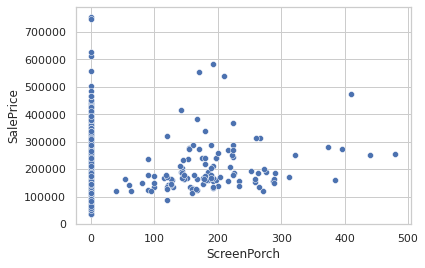

1.9721400194702135e-05


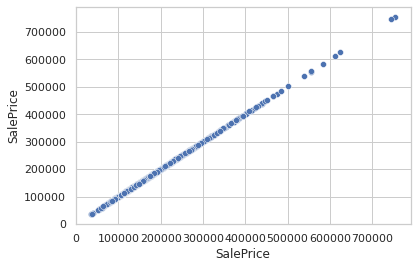

0.0


In [59]:

#
from scipy.stats import pearsonr

#
non_sig_list = []
data = train_df.copy()
for i in cont_variables:
  sns.scatterplot(x = train_df[i], y = train_df["SalePrice"])
  plt.show()
  # Running Pearson Correlation
  pearson_value = pearsonr(train_df[i], train_df["SalePrice"])[1]
  print(pearson_value)
  if pearson_value > .05:
    non_sig_list.append(i)


In [60]:

# non correlated feature
non_sig_list

['BsmtFinSF2']

In [61]:
# droping ['BsmtFinSF2']
train_df.drop(columns = 'BsmtFinSF2', inplace = True)

Running Anova using regression Analysis For categorical Variables

In [62]:

#
import statsmodels.api as sm

In [63]:

#For categorical Variables
data = train_df.copy()
Non_sig_features = []

# 
for i in cat_variables:
  X = pd.get_dummies(data[i])
  y = data['SalePrice']
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  p_value = model.f_pvalue

  #
  if p_value> .05:
    Non_sig_features.append(i)




In [64]:
Non_sig_features

['Street', 'Utilities', 'LandSlope', 'BsmtFinType2']

In [65]:
#droping Non sig features
train_df.drop(columns=Non_sig_features, inplace= True)

In [66]:
#For ordinal Variables
data = train_df.copy()
Non_sig_features = []

# 
for i in ordinal_data:
  X = pd.get_dummies(data[i])
  y = data['SalePrice']
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  p_value = model.f_pvalue

  #
  if p_value> .05:
    Non_sig_features.append(i)

In [67]:
Non_sig_features

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold']

In [68]:
train_df.drop(columns= Non_sig_features, inplace = True)

In [69]:
# checking the shape of final dataset
train_df.shape

(1460, 66)

Feature Scaling

In [70]:
# For continues variables except sale price
excluded = ['SalePrice', 'BsmtFinSF2']
cont_column = [i for i in cont_variables if i not in excluded]

In [71]:

#
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

train_df[cont_column] = Scaler.fit_transform(train_df[cont_column])

In [72]:
#Categorical Columns
cat_columns = [i for i in train_df.select_dtypes("O").columns]
cat_columns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [73]:
#
for i in cat_columns:
  train_df[i] = pd.get_dummies(train_df[i])


##Modeling

In [74]:
X = train_df.drop("SalePrice", axis = 1)
y = train_df["SalePrice"]

In [75]:
print(X.shape)
print(y.shape)

(1460, 65)
(1460,)


In [76]:
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
print(X_train.shape, y_train.shape)

(1168, 65) (1168,)


#**Multiple Linear regression**

In [78]:
# importing libraries
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [79]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_hat_ln = lm.predict(X_test)

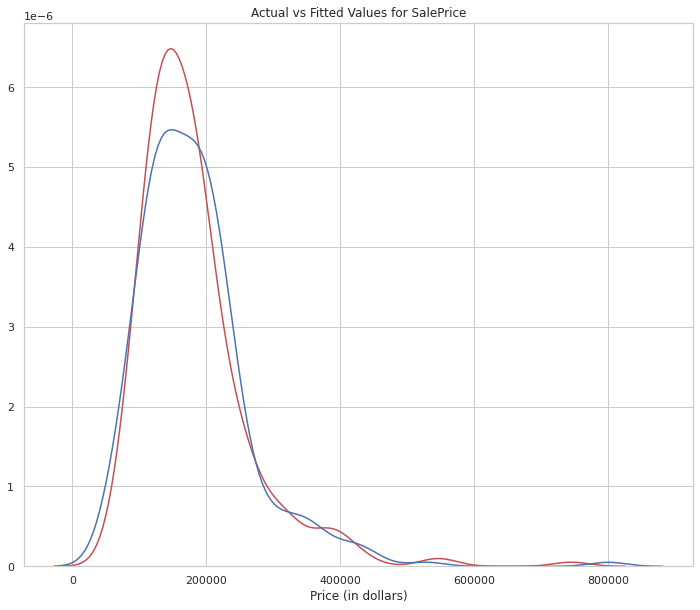

In [81]:

#Model Evaluation
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_ln, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for SalePrice')
plt.xlabel('Price (in dollars)')
plt.ylabel("")
#plt.savefig("day17.png")
#files.download("day17.png")

plt.show()



In [123]:
comp_df = pd.DataFrame({"Actual": y_test, "Predicted":  y_hat_ln})
comp_df.head()

Actual      Predicted
529  200624  238628.149230
491  133000  149909.673031
459  110000   91084.613652
279  192000  223324.278080
655   88000  101842.148872

In [83]:

# R^ 2 and mean square error
from sklearn.metrics import mean_squared_error

r_squared = lm.score(X_train, y_train)
print("R ^2 value is ", r_squared)
mse = mean_squared_error(y_test, y_hat_ln)
print("Mse is ", mse)

R ^2 value is  0.8803620676716782
Mse is  2285126947.5338125


#**For Test.csv**

In [84]:
test= pd.read_csv("test.csv")

In [85]:
test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [86]:
len(test)

1459

In [87]:
test.shape

(1459, 80)

In [88]:
test_df = test.copy()

In [89]:
columns = X.columns

In [90]:
test_df = test_df[columns]

In [91]:
test_df.shape

(1459, 65)

In [92]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          20       RH         80.0    11622      Reg         Lvl    Inside   
1          20       RL         81.0    14267      IR1         Lvl    Corner   
2          60       RL         74.0    13830      IR1         Lvl    Inside   
3          60       RL         78.0     9978      IR1         Lvl    Inside   
4         120       RL         43.0     5005      IR1         HLS    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1961          1961     Gable  CompShg     VinylSd   
1            6       1958          1958       Hip  CompShg     Wd Sdng   
2            5       1997          1998     Gable  CompShg     VinylSd   
3            6       1998          1998     Gable  CompShg     VinylSd   
4            5       1992          1992     Gable  CompShg     HdBoard   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd       None         0.0        TA        TA     CBlock       TA   
1     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA   
2     VinylSd       None         0.0        TA        TA      PConc       Gd   
3     VinylSd    BrkFace        20.0        TA        TA      PConc       TA   
4     HdBoard       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       TA           No          Rec       468.0      270.0        882.0   
1       TA           No          ALQ       923.0      406.0       1329.0   
2       TA           No          GLQ       791.0      137.0        928.0   
3       TA           No          GLQ       602.0      324.0        926.0   
4       TA           No          ALQ       263.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       896         0        896   
1    GasA        TA          Y      SBrkr      1329         0       1329   
2    GasA        Gd          Y      SBrkr       928       701       1629   
3    GasA        Ex          Y      SBrkr       926       678       1604   
4    GasA        Ex          Y      SBrkr      1280         0       1280   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         1         1             3             1          Gd   
2           0.0         2         1             3             1          TA   
3           0.0         2         1             3             1          Gd   
4           0.0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0         NaN     Attchd       1961.0   
1             6        Typ           0         NaN     Attchd       1958.0   
2             6        Typ           1          TA     Attchd       1997.0   
3             7        Typ           1          Gd     Attchd       1998.0   
4             5        Typ           0         NaN     Attchd       1992.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Unf         1.0       730.0         TA         TA          Y   
1          Unf         1.0       312.0         TA         TA          Y   
2          Fin         2.0       482.0         TA         TA          Y   
3    

In [93]:
null_df = test_df.isnull().sum()[test_df.isnull().sum() > 0].sort_values(ascending = False).reset_index()
null_df

index    0
0    FireplaceQu  730
1    LotFrontage  227
2     GarageQual   78
3   GarageFinish   78
4    GarageYrBlt   78
5     GarageCond   78
6     GarageType   76
7       BsmtCond   45
8   BsmtExposure   44
9       BsmtQual   44
10  BsmtFinType1   42
11    MasVnrType   16
12    MasVnrArea   15
13      MSZoning    4
14  BsmtFullBath    2
15    Functional    2
16   Exterior2nd    1
17   Exterior1st    1
18      SaleType    1
19    BsmtFinSF1    1
20     BsmtUnfSF    1
21   KitchenQual    1
22    GarageCars    1
23    GarageArea    1
24   TotalBsmtSF    1

In [94]:
null_df_list = null_df["index"].values.tolist()

In [95]:
null_df_list

['FireplaceQu',
 'LotFrontage',
 'GarageQual',
 'GarageFinish',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtFullBath',
 'Functional',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

In [96]:

null_obj_list = [i for i in null_df_list if test_df[i].dtype == "O"]
null_obj_list

['FireplaceQu',
 'GarageQual',
 'GarageFinish',
 'GarageCond',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'MasVnrType',
 'MSZoning',
 'Functional',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'KitchenQual']

In [97]:
null_year_list = [i for i in null_df_list if "Yr" in i or "Year" in i]
null_year_list

['GarageYrBlt']

In [98]:
null_ordinal_list = [i for i in null_df_list if test_df[i].nunique() < 50 and i not in null_obj_list]
null_ordinal_list

['BsmtFullBath', 'GarageCars']

In [100]:
null_quant_list = [i for i in null_df_list if i not in null_obj_list and i not in null_year_list and i not in null_ordinal_list]
null_quant_list

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'TotalBsmtSF']

In [101]:
mode_dict_cat = {}
#l = len(null_obj_list)
for i in null_obj_list:
  mode_dict_cat[i] = test_df[i].value_counts().idxmax()
mode_dict_cat

{'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'GLQ',
 'BsmtQual': 'TA',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'FireplaceQu': 'Gd',
 'Functional': 'Typ',
 'GarageCond': 'TA',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageType': 'Attchd',
 'KitchenQual': 'TA',
 'MSZoning': 'RL',
 'MasVnrType': 'None',
 'SaleType': 'WD'}

In [102]:
mode_ordinal_dict = {}
#l = len(null_obj_list)
for i in null_ordinal_list:
  mode_ordinal_dict[i] = test_df[i].value_counts().idxmax()
mode_ordinal_dict

{'BsmtFullBath': 0.0, 'GarageCars': 2.0}

In [103]:
mode_year_dict = {}
#l = len(null_obj_list)
for i in null_year_list:
  mode_year_dict[i] = test_df[i].value_counts().idxmax()
mode_year_dict

{'GarageYrBlt': 2005.0}

In [104]:
# Creating a dictionory for mean values
mean_dict = {}
for i in null_quant_list:
  mean_dict[i] = test_df[i].mean()
mean_dict

{'BsmtFinSF1': 439.2037037037037,
 'BsmtUnfSF': 554.2949245541838,
 'GarageArea': 472.76886145404666,
 'LotFrontage': 68.58035714285714,
 'MasVnrArea': 100.70914127423822,
 'TotalBsmtSF': 1046.1179698216736}

In [105]:
null_quant_keys = list(mean_dict.keys())

In [106]:
# Imputing null quant values
def imputation(data):
  test_df[data].replace(np.nan, mean_dict[data], inplace = True)
  return test_df[data].isnull().sum()


In [107]:
for i in null_quant_list:
  print(imputation(i))



0
0
0
0
0
0


In [108]:
# Function for categorical values 
def imputation(data):
  test_df[data].replace(np.nan, mode_dict_cat[data], inplace = True)
  return test_df[data].isnull().sum()


In [109]:
# Imputing categrorical values
for i in null_obj_list:
  imputation(i)

In [110]:
# Function for filling year values 
def imputation(data):
  test_df[data].replace(np.nan, mode_year_dict[data], inplace = True)
  return test_df[data].isnull().sum()


In [111]:
for i in null_year_list:
  imputation(i)

In [112]:
# Function for filling ordinal values 
def imputation(data):
  test_df[data].replace(np.nan, mode_ordinal_dict[data], inplace = True)
  return test_df[data].isnull().sum

In [113]:
for i in null_ordinal_list:
  imputation(i)

In [114]:
#Checking for total null values
test_df.isnull().sum().sum()

0

All Null Values Cleared

In [115]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          20       RH         80.0    11622      Reg         Lvl    Inside   
1          20       RL         81.0    14267      IR1         Lvl    Corner   
2          60       RL         74.0    13830      IR1         Lvl    Inside   
3          60       RL         78.0     9978      IR1         Lvl    Inside   
4         120       RL         43.0     5005      IR1         HLS    Inside   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1961          1961     Gable  CompShg     VinylSd   
1            6       1958          1958       Hip  CompShg     Wd Sdng   
2            5       1997          1998     Gable  CompShg     VinylSd   
3            6       1998          1998     Gable  CompShg     VinylSd   
4            5       1992          1992     Gable  CompShg     HdBoard   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd       None         0.0        TA        TA     CBlock       TA   
1     Wd Sdng    BrkFace       108.0        TA        TA     CBlock       TA   
2     VinylSd       None         0.0        TA        TA      PConc       Gd   
3     VinylSd    BrkFace        20.0        TA        TA      PConc       TA   
4     HdBoard       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       TA           No          Rec       468.0      270.0        882.0   
1       TA           No          ALQ       923.0      406.0       1329.0   
2       TA           No          GLQ       791.0      137.0        928.0   
3       TA           No          GLQ       602.0      324.0        926.0   
4       TA           No          ALQ       263.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       896         0        896   
1    GasA        TA          Y      SBrkr      1329         0       1329   
2    GasA        Gd          Y      SBrkr       928       701       1629   
3    GasA        Ex          Y      SBrkr       926       678       1604   
4    GasA        Ex          Y      SBrkr      1280         0       1280   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         1         1             3             1          Gd   
2           0.0         2         1             3             1          TA   
3           0.0         2         1             3             1          Gd   
4           0.0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0          Gd     Attchd       1961.0   
1             6        Typ           0          Gd     Attchd       1958.0   
2             6        Typ           1          TA     Attchd       1997.0   
3             7        Typ           1          Gd     Attchd       1998.0   
4             5        Typ           0          Gd     Attchd       1992.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Unf         1.0       730.0         TA         TA          Y   
1          Unf         1.0       312.0         TA         TA          Y   
2          Fin         2.0       482.0         TA         TA          Y   
3    

In [116]:
# Finding different type of variables
obj_list= [i for i in test_df.select_dtypes("O").columns]
year_variables = [i for i in test_df.columns if "Yr" in i or "Year" in i]
ordinal_variables = [i for i in test_df.columns if test_df[i].nunique() < 50 and i not in obj_list and i not in year_variables]
quant_list = [i for i in test_df.columns if i not in obj_list and i not in year_variables and i not in ordinal_variables]

In [117]:
# encoding categorical variables
for i in obj_list:
  test_df[i] = pd.get_dummies(test_df[i])

In [118]:
test_df[obj_list].head()

MSZoning  LotShape  LandContour  LotConfig  Neighborhood  Condition1  \
0         0         0            0          0             0           0   
1         0         1            0          1             0           0   
2         0         1            0          0             0           0   
3         0         1            0          0             0           0   
4         0         1            0          0             0           0   

   Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
0           0         1           0          0         1            0   
1           0         1           0          0         1            0   
2           0         1           0          0         1            0   
3           0         1           0          0         1            0   
4           0         0           0          0         1            0   

   Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
0            0           0          0          0           0         0   
1            0           0          0          0           0         0   
2            0           0          0          0           0         0   
3            0           0          0          0           0         0   
4            0           0          0          0           0         0   

   BsmtCond  BsmtExposure  BsmtFinType1  Heating  HeatingQC  CentralAir  \
0         0             0             0        1          0           0   
1         0             0             1        1          0           0   
2         0             0             0        1          0           0   
3         0             0             0        1          1           0   
4         0             0             1        1          1           0   

   Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  \
0           0            0           0            0           0             0   
1           0            0           0            0           0             0   
2           0            0           0            0           0             1   
3           0            0           0            0           0             1   
4           0            0           0            0           0             0   

   GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition  
0           0           0           0         0              0  
1           0           0           0         0              0  
2           0           0           0         0              0  
3           0           0           0         0              0  
4           0           0           0         0              0

In [119]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

test_df[quant_list] = Scaler.fit_transform(test_df[quant_list])

In [120]:
# Predicting the values
y_test_hat = lm.predict(test_df)

In [121]:
test["Predicted_price"] = y_test_hat

In [122]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

##** END **

#**THANK YOU**